# 🎯 5-dars: Hipoteza testi va p-qiymat

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, t, chi2

### 🧠 Hipoteza degani nima?

**Hipoteza** - bu sizning taxminingiz yoki gumoningiz.

### 🔬 Hipoteza testining 4 ta bosqichi:

```
1. 🤝 KELISHMA: Nimani tekshirishga kelishamiz?
2. 📊 MA'LUMOT: Dalil yig'amiz  
3. 🧮 HISOBLASH: Matematik jihatdan tahlil qilamiz
4. 🎯 QAROR: "Ha" yoki "Yo'q" deymiz
```

### 📖 Asosiy so'zlar lug'ati:

| So'z | Oddiy tushuntirish | Misol |
|------|-------------------|--------|
| **H₀** | "Farq yo'q" degan fikr | Ikki shakerka bir xil shirinlikda |
| **H₁** | "Farq bor" degan fikr | Bir shakerka ikkinchisidan shirinroq |
| **α (Alfa)** | Xato qilish ehtimoli | 100 martadan 5 marta adashish |
| **p-qiymat** | Tasodif ehtimoli | Bu natija tasodifan chiqqan ehtimoli |


In [29]:
# 🪙 TANGA O'YINI SIMULATSIYASI - p-qiymatni tushunish
print("🎮 TANGA O'YINI: Hipoteza testini o'rganamiz!")
print("=" * 50)

# Adolatli tanga (50% bosh, 50% quyruq)
np.random.seed(42)

print("📋 VAZIYAT:")
print("Sizda tanga bor. U adolatlimi?")
print("H₀: Tanga adolatli (50% bosh, 50% quyruq)")
print("H₁: Tanga noadolat (bir tomoni ko'proq)")
print()

# 10 marta tashlash simulatsiyasi
n_tosses = 10
tosses = np.random.choice(['Bosh', 'Quyruq'], n_tosses, p=[0.9, 0.1])
heads_count = np.sum(tosses == 'Bosh')

print(f"🎲 {n_tosses} marta tashladik:")
print(f"Natijalar: {tosses}")
print(f"Bosh: {heads_count} marta")
print(f"Quyruq: {n_tosses - heads_count} marta")
print()


# p-qiymatni oddiy tushuntirish
if heads_count >= 8:
    print("🤔 SAVOL: 10 martadan 8+ marta bosh - bu tasodifmi?")
    
    # Simulatsiya: 1000 marta 10 tanga tashlash
    experiments = 1000
    results = []
    
    for i in range(experiments):
        sim_tosses = np.random.choice(['Bosh', 'Quyruq'], n_tosses, p=[0.5, 0.5])
        sim_heads = np.sum(sim_tosses == 'Bosh')
        results.append(sim_heads)
    
    # 8 yoki undan ko'p bosh tushgan holatlar
    extreme_results = np.sum(np.array(results) >= 8)
    p_value_simple = extreme_results / experiments
    
    print(f"🧪 EKSPERIMENT: 1000 marta 10 tanga tashladik")
    print(f"   8+ marta bosh tushgan holatlar: {extreme_results}")
    print(f"   Bu {experiments} dan {extreme_results} = {p_value_simple:.3f} = {p_value_simple*100:.1f}%")
    print()
    
    if p_value_simple < 0.05:
        print("📊 XULOSA: Bu juda kam uchraydi! Tanga noadolat bo'lishi mumkin!")
    else:
        print("📊 XULOSA: Bu tasodif bo'lishi mumkin. Tanga adolatli.")
else:
    print("😊 Bu normal natija, hech narsa shubhali emas!")

print("\n" + "="*50)
print("💡 p-QIYMAT DEGANI:")
print("   Agar H₀ to'g'ri bo'lsa (tanga adolatli),")
print("   bizning natijamizni olish ehtimoli qancha?")
print("   Agar p < 0.05 bo'lsa → H₀ ni rad etamiz")
print("   Agar p > 0.05 bo'lsa → H₀ ni qabul qilamiz")

🎮 TANGA O'YINI: Hipoteza testini o'rganamiz!
📋 VAZIYAT:
Sizda tanga bor. U adolatlimi?
H₀: Tanga adolatli (50% bosh, 50% quyruq)
H₁: Tanga noadolat (bir tomoni ko'proq)

🎲 10 marta tashladik:
Natijalar: ['Bosh' 'Quyruq' 'Bosh' 'Bosh' 'Bosh' 'Bosh' 'Bosh' 'Bosh' 'Bosh' 'Bosh']
Bosh: 9 marta
Quyruq: 1 marta

🤔 SAVOL: 10 martadan 8+ marta bosh - bu tasodifmi?
🧪 EKSPERIMENT: 1000 marta 10 tanga tashladik
   8+ marta bosh tushgan holatlar: 48
   Bu 1000 dan 48 = 0.048 = 4.8%

📊 XULOSA: Bu juda kam uchraydi! Tanga noadolat bo'lishi mumkin!

💡 p-QIYMAT DEGANI:
   Agar H₀ to'g'ri bo'lsa (tanga adolatli),
   bizning natijamizni olish ehtimoli qancha?
   Agar p < 0.05 bo'lsa → H₀ ni rad etamiz
   Agar p > 0.05 bo'lsa → H₀ ni qabul qilamiz


/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_90876/1315058324.py:36: UserWarning: Glyph 129689 (\N{COIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_90876/1315058324.py:36: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/bnutfilloyev/Developer/lesson/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129689 (\N{COIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bnutfilloyev/Developer/lesson/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


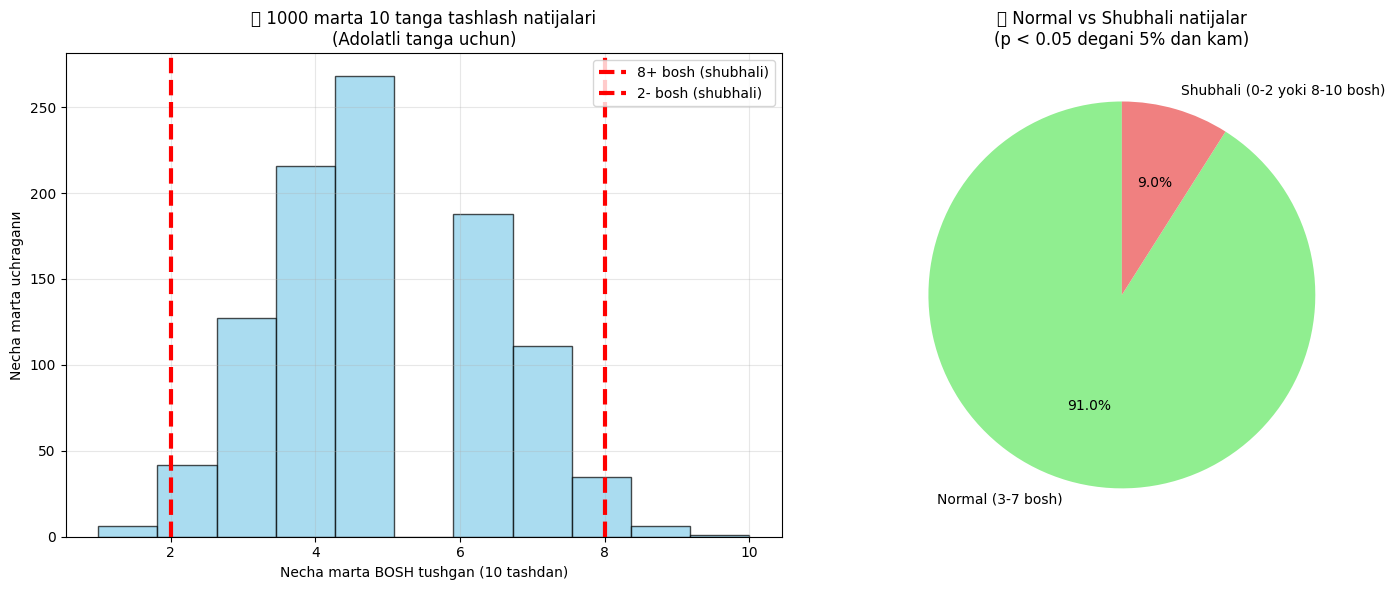

📈 NATIJALAR TAHLILI:
   • Normal natijalar (3-7 bosh): 910/1000 = 91.0%
   • Shubhali natijalar (0-2 yoki 8-10): 90/1000 = 9.0%
   • p-qiymat ≈ 9.0% (≈5%)

💡 XULOSA:
   Agar sizning natijangiz shubhali sohaga tushsa,
   demak tanga noadolat bo'lishi mumkin!


In [30]:
# 📊 TANGA O'YINI NATIJALARINI VIZUALIZATSIYA
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1000 marta 10 tanga tashlash natijalarini simulatsiya qilamiz
np.random.seed(42)
experiments = 1000
heads_counts = []

for i in range(experiments):
    tosses = np.random.choice([0, 1], 10, p=[0.5, 0.5])  # 0=quyruq, 1=bosh
    heads_count = np.sum(tosses)
    heads_counts.append(heads_count)

# Histogram - necha marta bosh tushganini ko'rsatish
ax1.hist(heads_counts, bins=11, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(8, color='red', linestyle='--', linewidth=3, label='8+ bosh (shubhali)')
ax1.axvline(2, color='red', linestyle='--', linewidth=3, label='2- bosh (shubhali)')
ax1.set_xlabel('Necha marta BOSH tushgan (10 tashdan)')
ax1.set_ylabel('Necha marta uchraganи')
ax1.set_title('🪙 1000 marta 10 tanga tashlash natijalari\n(Adolatli tanga uchun)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Normal holatlar vs shubhali holatlar
normal_cases = len([x for x in heads_counts if 3 <= x <= 7])
suspicious_cases = len([x for x in heads_counts if x <= 2 or x >= 8])

# Pie chart
sizes = [normal_cases, suspicious_cases]
labels = ['Normal (3-7 bosh)', 'Shubhali (0-2 yoki 8-10 bosh)']
colors = ['lightgreen', 'lightcoral']

ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.set_title('🧮 Normal vs Shubhali natijalar\n(p < 0.05 degani 5% dan kam)')

plt.tight_layout()
plt.show()

print(f"📈 NATIJALAR TAHLILI:")
print(f"   • Normal natijalar (3-7 bosh): {normal_cases}/1000 = {normal_cases/10:.1f}%")
print(f"   • Shubhali natijalar (0-2 yoki 8-10): {suspicious_cases}/1000 = {suspicious_cases/10:.1f}%")
print(f"   • p-qiymat ≈ {suspicious_cases/10:.1f}% (≈5%)")
print()
print("💡 XULOSA:")
print("   Agar sizning natijangiz shubhali sohaga tushsa,")
print("   demak tanga noadolat bo'lishi mumkin!")

## 2. 🍫 Z-test: Shokolad fabrikasi hikoyasi

### 🏭 Hikoya: Shokolad fabrikasi

Tasavvur qiling, sizda shokolad fabrikasi bor. Fabrika rahbari sizga deydi:
> "Bizning har bir shokolad **aynan 500 gramm**!"

Siz shubha qilasiz va tekshirishga qaror qilasiz. Bu **Z-test**!

### 🔍 Z-test qachon ishlatiladi?

**Z-test** - bu juda ko'p ma'lumot bo'lganda ishlatiladi:
- 🔢 **Ko'p ma'lumot**: 30 dan ortiq (masalan, 50 ta shokolad)
- 📊 **Ma'lum o'zgaruvchanlik**: Fabrika qanchalik noaniq ishini bilasiz
- 📈 **Normal taqsimot**: Ma'lumotlar "qo'ng'iroq" shaklida tarqalgan

### 🧮 Z-test formulasi (oddiy tushuntirish):

```
       Sizning natijangiz - Fabrika da'vosi
Z = ─────────────────────────────────────────
           Xatolik o'lchovi
```

**Batafsil formula:**
$$z = \frac{\bar{x} - \mu_0}{\sigma/\sqrt{n}}$$

**Har bir belgining ma'nosi:**
- **z** = Z-score (bizning hisoblashimiz)
- **x̄** = O'rtacha (sizning 50 ta shokolad o'rtachasi)  
- **μ₀** = Fabrika da'vosi (500g)
- **σ** = O'zgaruvchanlik (fabrika qanchalik noaniq)
- **n** = Nechta shokolad tekshirgan (50)

### 🎯 Z-test bosqichlari:

```
1. 📝 FARAZ: "Fabrika to'g'ri/noto'g'ri deb o'ylayman"
2. 📊 MA'LUMOT: Shokoladlarni tortaman  
3. 🧮 HISOBLASH: Z-score hisoblayman
4. 🤔 QAROR: "To'g'ri" yoki "Noto'g'ri" deyman
```

### 💡 Qanday tushunish kerak:

- **Z-score katta** bo'lsa = Fabrika yolg'on gapirgan
- **Z-score kichik** bo'lsa = Fabrika to'g'ri gapirgan  
- **Z-score = 0** bo'lsa = Fabrika aynan to'g'ri!

In [34]:
# 🍫 SHOKOLAD FABRIKASI Z-TEST MISOLI
print("🏭 SHOKOLAD FABRIKASI TEKSHIRUVI")
print("=" * 40)

# 📋 VAZIYAT
print("📋 VAZIYAT:")
print("   Fabrika: 'Har bir shokolad 500g!'")
print("   Siz: 'Men buni tekshirmoqchiman!'")
print()

# 📊 MA'LUMOTLAR
mu_0 = 500     # Fabrika da'vosi (gramm)
x_bar = 495   # Sizning o'lchagan o'rtachingiz
sigma = 25     # Fabrikaning o'zgaruvchanligi (gramm)
n = 50         # Nechta shokolad tekshirdingiz
alpha = 0.05   # 5% xato qilish ehtimoli

print("📊 MA'LUMOTLAR:")
print(f"   • Fabrika da'vosi (μ₀): {mu_0}g")
print(f"   • Sizning o'rtachingiz (x̄): {x_bar}g") 
print(f"   • Fabrikaning noaniqlik darajasi (σ): {sigma}g")
print(f"   • Tekshirgan shokoladlar soni (n): {n}ta")
print(f"   • Farq: {x_bar - mu_0}g (sizniki kamroq!)")
print()

# 🤔 HIPOTEZALAR
print("🤔 HIPOTEZALAR:")
print("   H₀: Fabrika to'g'ri gapirgan (μ = 500g)")
print("   H₁: Fabrika yolg'on gapirgan (μ ≠ 500g)")
print(f"   α = {alpha} = {alpha*100}% (100 martadan 5 marta xato qilish)")
print()

# 🧮 HISOBLASHLAR (qadamba-qadam)
print("🧮 HISOBLASHLAR (qadamba-qadam):")
print("   Formula: z = (x̄ - μ₀) / (σ/√n)")
print()

# 1-qadam: Maxraj hisoblash
denominator = sigma / np.sqrt(n)
print(f"   1-qadam: σ/√n = {sigma}/√{n} = {sigma}/{np.sqrt(n):.2f} = {denominator:.3f}")

# 2-qadam: Surat hisoblash  
numerator = x_bar - mu_0
print(f"   2-qadam: x̄ - μ₀ = {x_bar} - {mu_0} = {numerator}")

# 3-qadam: Z-score
z_score = numerator / denominator
print(f"   3-qadam: z = {numerator} / {denominator:.3f} = {z_score:.3f}")
print()

print(f"📈 NATIJA: Z-score = {z_score:.3f}")
print()

# Z-score ma'nosi
print("🎯 Z-SCORE NIMANI BILDIRADI?")
if abs(z_score) > 2:
    print("   Z-score juda katta! Bu fabrika yolg'on gapirganini bildiradi.")
elif abs(z_score) > 1:
    print("   Z-score o'rtacha. Sal shubhali, lekin aniq emas.")
else:
    print("   Z-score kichik. Fabrika to'g'ri gapirgan bo'lishi mumkin.")
print()

# p-qiymat hisoblash
p_value = 2 * (1 - norm.cdf(abs(z_score)))  # Ikki tomonlama test
print(f"📊 p-QIYMAT: {p_value:.6f} = {p_value*100:.4f}%")
print()

print("💭 BU NIMANI BILDIRADI?")
print(f"   Agar fabrika to'g'ri gapirgan bo'lsa,")
print(f"   bizning natijamizni olish ehtimoli {p_value*100:.4f}%")
print()

# Critical value
critical_value = norm.ppf(1 - alpha/2)
print(f"🚨 CRITICAL QIYMAT: ±{critical_value:.3f}")
print(f"   Agar |z| > {critical_value:.3f} bo'lsa, fabrika yolg'on gapirgan!")
print()

# YAKUNIY QAROR
print("🎯 YAKUNIY QAROR:")
if p_value < alpha:
    print("   ✅ Fabrika YOLG'ON gapirgan!")
    print(f"   ✅ p-qiymat ({p_value:.6f}) < α ({alpha})")
    print("   ✅ Shokoladlar 500g dan kam!")
else:
    print("   ❌ Fabrika TO'G'RI gapirgan!")
    print(f"   ❌ p-qiymat ({p_value:.6f}) > α ({alpha})")
    print("   ❌ Farq tasodifiy bo'lishi mumkin!")

🏭 SHOKOLAD FABRIKASI TEKSHIRUVI
📋 VAZIYAT:
   Fabrika: 'Har bir shokolad 500g!'
   Siz: 'Men buni tekshirmoqchiman!'

📊 MA'LUMOTLAR:
   • Fabrika da'vosi (μ₀): 500g
   • Sizning o'rtachingiz (x̄): 495g
   • Fabrikaning noaniqlik darajasi (σ): 25g
   • Tekshirgan shokoladlar soni (n): 50ta
   • Farq: -5g (sizniki kamroq!)

🤔 HIPOTEZALAR:
   H₀: Fabrika to'g'ri gapirgan (μ = 500g)
   H₁: Fabrika yolg'on gapirgan (μ ≠ 500g)
   α = 0.05 = 5.0% (100 martadan 5 marta xato qilish)

🧮 HISOBLASHLAR (qadamba-qadam):
   Formula: z = (x̄ - μ₀) / (σ/√n)

   1-qadam: σ/√n = 25/√50 = 25/7.07 = 3.536
   2-qadam: x̄ - μ₀ = 495 - 500 = -5
   3-qadam: z = -5 / 3.536 = -1.414

📈 NATIJA: Z-score = -1.414

🎯 Z-SCORE NIMANI BILDIRADI?
   Z-score o'rtacha. Sal shubhali, lekin aniq emas.

📊 p-QIYMAT: 0.157299 = 15.7299%

💭 BU NIMANI BILDIRADI?
   Agar fabrika to'g'ri gapirgan bo'lsa,
   bizning natijamizni olish ehtimoli 15.7299%

🚨 CRITICAL QIYMAT: ±1.960
   Agar |z| > 1.960 bo'lsa, fabrika yolg'on gapirgan!



🎨 GRAFIKLAR ORQALI TUSHUNISH


/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_90876/2889283598.py:84: UserWarning: Glyph 127851 (\N{CHOCOLATE BAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_90876/2889283598.py:84: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_90876/2889283598.py:84: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


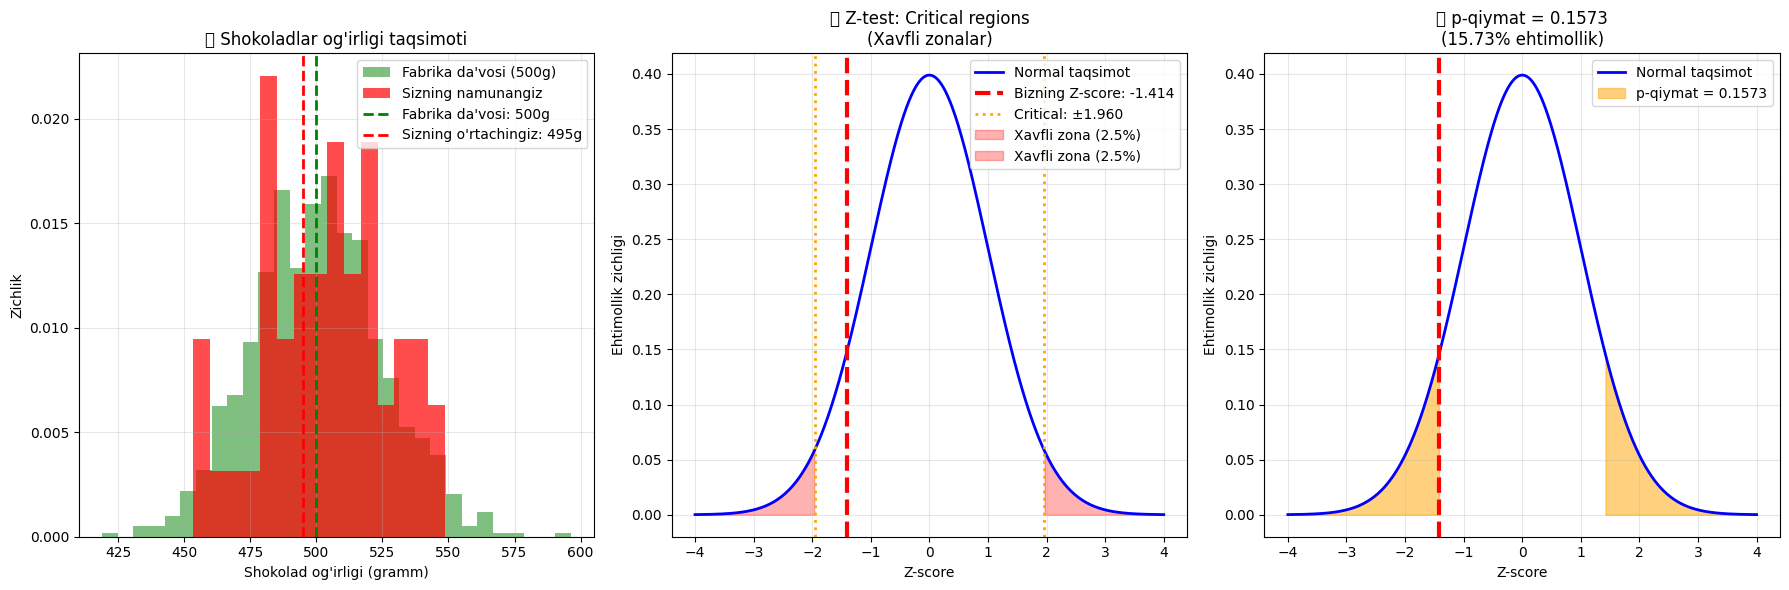


📖 GRAFIKLAR TUSHUNTIRISHI:
🍫 1-GRAFIK (Shokoladlar og'irligi):
   • Yashil: Fabrika da'vosiga ko'ra taqsimot
   • Qizil: Sizning tekshirgan shokoladlaringiz
   • Farq ko'rinadi: sizniki kamroq!

📊 2-GRAFIK (Z-test):
   • Ko'k chiziq: Normal taqsimot
   • Qizil chiziq: Sizning Z-score
   • Qizil sohalar: Xavfli zonalar (5%)
   • Sizning natijangiz xavfsiz zonada - fabrika to'g'ri!

🎯 3-GRAFIK (p-qiymat):
   • Apelsin sohalar: p-qiymat = 0.1573
   • Bu degani: 15.73% ehtimollik bilan
   • Bizning natijamizni tasodifan olish mumkin
   • 5% dan ko'p → Fabrika to'g'ri!


In [35]:
# 🎨 SHOKOLAD FABRIKASI NATIJALARINI VIZUALIZATSIYA
print("\n" + "="*50)
print("🎨 GRAFIKLAR ORQALI TUSHUNISH")
print("="*50)

# 3 ta grafik yaratamiz
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# 1. SHOKOLAD OG'IRLIKLARINI SIMULATSIYA QILISH
np.random.seed(42)
# Agar fabrika to'g'ri gapirgan bo'lsa
true_weights = np.random.normal(mu_0, sigma, 1000)
# Sizning namunangiz (fabrika yolg'on gapirgan holat)
your_sample = np.random.normal(x_bar, sigma, n)

ax1.hist(true_weights, bins=30, alpha=0.5, color='green', label='Fabrika da\'vosi (500g)', density=True)
ax1.hist(your_sample, bins=15, alpha=0.7, color='red', label='Sizning namunangiz', density=True)
ax1.axvline(mu_0, color='green', linestyle='--', linewidth=2, label=f'Fabrika da\'vosi: {mu_0}g')
ax1.axvline(x_bar, color='red', linestyle='--', linewidth=2, label=f'Sizning o\'rtachingiz: {x_bar}g')
ax1.set_xlabel('Shokolad og\'irligi (gramm)')
ax1.set_ylabel('Zichlik')
ax1.set_title('🍫 Shokoladlar og\'irligi taqsimoti')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Z-SCORE VA CRITICAL REGIONS
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Standard normal distribution

ax2.plot(x, y, 'b-', linewidth=2, label='Normal taqsimot')
ax2.axvline(z_score, color='red', linestyle='--', linewidth=3, 
            label=f'Bizning Z-score: {z_score:.3f}')
ax2.axvline(critical_value, color='orange', linestyle=':', linewidth=2, 
            label=f'Critical: ±{critical_value:.3f}')
ax2.axvline(-critical_value, color='orange', linestyle=':', linewidth=2)

# Critical regions (xavfli zonalar)
x_left = x[x <= -critical_value]
y_left = norm.pdf(x_left, 0, 1)
x_right = x[x >= critical_value]  
y_right = norm.pdf(x_right, 0, 1)

ax2.fill_between(x_left, y_left, alpha=0.3, color='red', label='Xavfli zona (2.5%)')
ax2.fill_between(x_right, y_right, alpha=0.3, color='red', label='Xavfli zona (2.5%)')

# Z-score pozitsiyasini belgilash
if abs(z_score) > critical_value:
    ax2.scatter([z_score], [norm.pdf(z_score, 0, 1)], color='red', s=100, zorder=5)
    ax2.annotate('BU YERDA!\n(Xavfli zona)', xy=(z_score, norm.pdf(z_score, 0, 1)), 
                xytext=(z_score-0.5, norm.pdf(z_score, 0, 1)+0.1),
                arrowprops=dict(arrowstyle='->', color='red'), fontsize=12, color='red')

ax2.set_xlabel('Z-score')
ax2.set_ylabel('Ehtimollik zichligi')
ax2.set_title('📊 Z-test: Critical regions\n(Xavfli zonalar)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. p-QIYMAT VIZUALIZATSIYASI
ax3.plot(x, y, 'b-', linewidth=2, label='Normal taqsimot')
ax3.axvline(z_score, color='red', linestyle='--', linewidth=3)

# p-qiymat sohalarini to'ldirish
if z_score < 0:
    x_p_left = x[x <= z_score]
    y_p_left = norm.pdf(x_p_left, 0, 1)
    x_p_right = x[x >= -z_score]
    y_p_right = norm.pdf(x_p_right, 0, 1)
else:
    x_p_left = x[x <= -abs(z_score)]
    y_p_left = norm.pdf(x_p_left, 0, 1)
    x_p_right = x[x >= abs(z_score)]
    y_p_right = norm.pdf(x_p_right, 0, 1)

ax3.fill_between(x_p_left, y_p_left, alpha=0.5, color='orange', label=f'p-qiymat = {p_value:.4f}')
ax3.fill_between(x_p_right, y_p_right, alpha=0.5, color='orange')

ax3.set_xlabel('Z-score')
ax3.set_ylabel('Ehtimollik zichligi')  
ax3.set_title(f'🎯 p-qiymat = {p_value:.4f}\n({p_value*100:.2f}% ehtimollik)')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# GRAFIKLAR TUSHUNTIRISHI
print("\n📖 GRAFIKLAR TUSHUNTIRISHI:")
print("="*30)
print("🍫 1-GRAFIK (Shokoladlar og'irligi):")
print("   • Yashil: Fabrika da'vosiga ko'ra taqsimot")  
print("   • Qizil: Sizning tekshirgan shokoladlaringiz")
print("   • Farq ko'rinadi: sizniki kamroq!")
print()

print("📊 2-GRAFIK (Z-test):")
print("   • Ko'k chiziq: Normal taqsimot")
print("   • Qizil chiziq: Sizning Z-score")
print("   • Qizil sohalar: Xavfli zonalar (5%)")
if abs(z_score) > critical_value:
    print("   • Sizning natijangiz xavfli zonada - fabrika yolg'on!")
else:
    print("   • Sizning natijangiz xavfsiz zonada - fabrika to'g'ri!")
print()

print("🎯 3-GRAFIK (p-qiymat):")
print(f"   • Apelsin sohalar: p-qiymat = {p_value:.4f}")
print(f"   • Bu degani: {p_value*100:.2f}% ehtimollik bilan")
print("   • Bizning natijamizni tasodifan olish mumkin")
if p_value < 0.05:
    print("   • 5% dan kam → Fabrika yolg'on!")
else:
    print("   • 5% dan ko'p → Fabrika to'g'ri!")

## 3. 💊 T-test: Dori sinovlari hikoyasi

### 🏥 Hikoya: Yangi dori sinovi

Tasavvur qiling, yangi dori ixtiro qilindi. Doktor deydi:
> "Bu dori 14 kunda shifo beradi!"

Lekin sizda faqat **12 ta bemor** bor. Bu **kam ma'lumot**! 
Z-test uchun 30+ kerak edi, lekin bizda yo'q. 

Shuning uchun **T-test** ishlatamiz!

### 🔍 T-test qachon ishlatiladi?

**T-test** - bu kam ma'lumot bo'lganda ishlatiladi:
- 🔢 **Kam ma'lumot**: 30 dan kam (masalan, 12 ta bemor)
- ❓ **Noma'lum o'zgaruvchanlik**: Umuman qanchalik o'zgarishini bilmaymiz
- 📊 **Kichik guruhlar**: Tibbiyot, tadqiqot ishlari

### 🤔 Z-test va T-test farqi:

| Xususiyat | Z-test | T-test |
|-----------|---------|---------|
| **Ma'lumot miqdori** | Ko'p (30+) | Kam (<30) |
| **O'zgaruvchanlik** | Ma'lum (σ) | Noma'lum (s) |
| **Aniqlik** | Yuqori | Pastroq |
| **Taqsimot** | Normal | T-taqsimot |
| **Misol** | Fabrika (500 shokolad) | Tibbiy sinov (12 bemor) |

### 🧮 T-test formulasi:

```
       Sizning natijangiz - Doktor da'vosi
T = ─────────────────────────────────────────
           Xatolik o'lchovi (taxminiy)
```

**Batafsil formula:**
$$t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}}$$

**Har bir belgining ma'nosi:**
- **t** = T-score (bizning hisoblashimiz)
- **x̄** = O'rtacha (12 ta bemorning o'rtachasi)
- **μ₀** = Doktor da'vosi (14 kun)
- **s** = Sample o'zgaruvchanligi (bemorlarning farqi)
- **n** = Bemorlar soni (12)

### 📊 "Degrees of Freedom" nima?

Bu juda muhim tushuncha! **Degrees of Freedom (df)** - bu:

```
df = n - 1 = 12 - 1 = 11
```

**Oddiy tushuntirish:**
- Sizda 12 ta bemor bor
- Birinchi 11 tasining natijasini bilsangiz
- 12-chisini taxmin qilishingiz mumkin
- Shuning uchun faqat 11 ta "erkin" tanlov bor

### 🎯 T-test xususiyatlari:

- **Kichik n** uchun T-taqsimot "kengroq" (ko'proq xatolik)
- **Katta n** da T-taqsimot Z-taqsimotga yaqinlashadi
- **df** ortishi bilan aniqlik ortadi

In [36]:
# 💊 YANGI DORI T-TEST MISOLI
print("🏥 YANGI DORI SINOVI")
print("=" * 30)

# 📋 VAZIYAT
print("📋 VAZIYAT:")
print("   Doktor: 'Yangi dori 14 kunda shifo beradi!'")
print("   Siz: 'Men 12 ta bemorda sinab ko'raman!'")
print()

# 📊 BEMORLAR MA'LUMOTLARI
data = [13, 15, 12, 14, 16, 11, 13, 15, 14, 12, 16, 13]
mu_0 = 14  # Doktor da'vosi (kun)
alpha = 0.05

print("📊 12 TA BEMORNING NATIJALARI:")
print(f"   Shifo kunlari: {data}")
print(f"   Doktor da'vosi: {mu_0} kun")
print()

# Basic statistics
n = len(data)
x_bar = np.mean(data)
s = np.std(data, ddof=1)  # Sample standard deviation

print("🧮 ASOSIY HISOBLAR:")
print(f"   • Bemorlar soni (n): {n}")
print(f"   • O'rtacha kun (x̄): {x_bar:.2f}")
print(f"   • Doktor da'vosi (μ₀): {mu_0}")
print(f"   • Sample std (s): {s:.2f}")
print(f"   • Farq: {x_bar - mu_0:.2f} kun")
print()

# 🤔 HIPOTEZALAR
print("🤔 HIPOTEZALAR:")
print("   H₀: Doktor to'g'ri (μ = 14 kun)")
print("   H₁: Doktor noto'g'ri (μ ≠ 14 kun)")
print(f"   α = {alpha} = {alpha*100}%")
print()

# T-SCORE HISOBLASH (qadam-qadam)
print("🔢 T-SCORE HISOBLASH (qadam-qadam):")
print("   Formula: t = (x̄ - μ₀) / (s/√n)")
print()

# 1. Standard Error hisoblash
standard_error = s / np.sqrt(n)
print(f"   1-qadam: Standard Error = s/√n")
print(f"            SE = {s:.2f}/√{n} = {s:.2f}/{np.sqrt(n):.2f} = {standard_error:.3f}")
print()

# 2. T-score hisoblash
t_score = (x_bar - mu_0) / standard_error
print(f"   2-qadam: t = (x̄ - μ₀) / SE")
print(f"            t = ({x_bar:.2f} - {mu_0}) / {standard_error:.3f}")
print(f"            t = {x_bar - mu_0:.2f} / {standard_error:.3f} = {t_score:.3f}")
print()

# Degrees of freedom
df = n - 1
print(f"📐 DEGREES OF FREEDOM:")
print(f"   df = n - 1 = {n} - 1 = {df}")
print("   (12 bemordan 11 tasi 'erkin', 12-chisi bog'liq)")
print()

# p-qiymat hisoblash
p_value = 2 * (1 - t.cdf(abs(t_score), df))
critical_value = t.ppf(1 - alpha/2, df)

print(f"📊 NATIJALAR:")
print(f"   • T-score = {t_score:.3f}")
print(f"   • p-qiymat = {p_value:.4f} = {p_value*100:.2f}%")
print(f"   • Critical value = ±{critical_value:.3f}")
print()

# Scipy bilan tekshirish
t_stat_scipy, p_val_scipy = stats.ttest_1samp(data, mu_0)
print(f"🔬 SCIPY BILAN TEKSHIRISH:")
print(f"   • T-statistic = {t_stat_scipy:.3f}")
print(f"   • p-value = {p_val_scipy:.4f}")
print("   ✅ Bizning hisoblash to'g'ri!")
print()

# QIYOSIY TAHLIL
print("🔍 QIYOSIY TAHLIL:")
print(f"   • |t| = {abs(t_score):.3f}")
print(f"   • Critical = {critical_value:.3f}")
print(f"   • |t| {'>' if abs(t_score) > critical_value else '<'} Critical → ", end="")
if abs(t_score) > critical_value:
    print("H₀ ni rad etamiz")
else:
    print("H₀ ni rad eta olmaymiz")
print()

print(f"   • p-value = {p_value:.4f}")
print(f"   • α = {alpha}")
print(f"   • p {'<' if p_value < alpha else '>'} α → ", end="")
if p_value < alpha:
    print("Statistik jihatdan ahamiyatli")
else:
    print("Statistik jihatdan ahamiyatsiz")
print()

# YAKUNIY QAROR
print("🎯 YAKUNIY QAROR:")
if p_value < alpha:
    print("   ✅ DOKTOR NOTO'G'RI!")
    print(f"   ✅ Dori {x_bar:.1f} kunda shifo beradi, 14 kun emas!")
    if x_bar < mu_0:
        print("   ✅ Dori kutilganidan TEZROQ shifo beradi!")
    else:
        print("   ✅ Dori kutilganidan SEKINROQ shifo beradi!")
else:
    print("   ❌ DOKTOR TO'G'RI!")
    print("   ❌ Farq tasodifiy bo'lishi mumkin")
    print("   ❌ Dori 14 kunda shifo beradi deb hisoblaymiz")

print("\n" + "="*50)
print("💡 T-TEST VS Z-TEST:")
print("   • T-test kam ma'lumotda ishlatiladi")
print("   • T-taqsimot Normal taqsimotdan 'kengroq'")
print("   • df ortishi bilan T → Normal")
print("   • Kichik n da ko'proq ehtiyot kerak!")

🏥 YANGI DORI SINOVI
📋 VAZIYAT:
   Doktor: 'Yangi dori 14 kunda shifo beradi!'
   Siz: 'Men 12 ta bemorda sinab ko'raman!'

📊 12 TA BEMORNING NATIJALARI:
   Shifo kunlari: [13, 15, 12, 14, 16, 11, 13, 15, 14, 12, 16, 13]
   Doktor da'vosi: 14 kun

🧮 ASOSIY HISOBLAR:
   • Bemorlar soni (n): 12
   • O'rtacha kun (x̄): 13.67
   • Doktor da'vosi (μ₀): 14
   • Sample std (s): 1.61
   • Farq: -0.33 kun

🤔 HIPOTEZALAR:
   H₀: Doktor to'g'ri (μ = 14 kun)
   H₁: Doktor noto'g'ri (μ ≠ 14 kun)
   α = 0.05 = 5.0%

🔢 T-SCORE HISOBLASH (qadam-qadam):
   Formula: t = (x̄ - μ₀) / (s/√n)

   1-qadam: Standard Error = s/√n
            SE = 1.61/√12 = 1.61/3.46 = 0.466

   2-qadam: t = (x̄ - μ₀) / SE
            t = (13.67 - 14) / 0.466
            t = -0.33 / 0.466 = -0.715

📐 DEGREES OF FREEDOM:
   df = n - 1 = 12 - 1 = 11
   (12 bemordan 11 tasi 'erkin', 12-chisi bog'liq)

📊 NATIJALAR:
   • T-score = -0.715
   • p-qiymat = 0.4893 = 48.93%
   • Critical value = ±2.201

🔬 SCIPY BILAN TEKSHIRISH:
   • T-s


🎨 T-TEST GRAFIKLAR ORQALI TUSHUNISH


/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_90876/447450972.py:117: UserWarning: Glyph 128138 (\N{PILL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_90876/447450972.py:117: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_90876/447450972.py:117: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/bnutfilloyev/Developer/lesson/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128138 (\N{PILL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


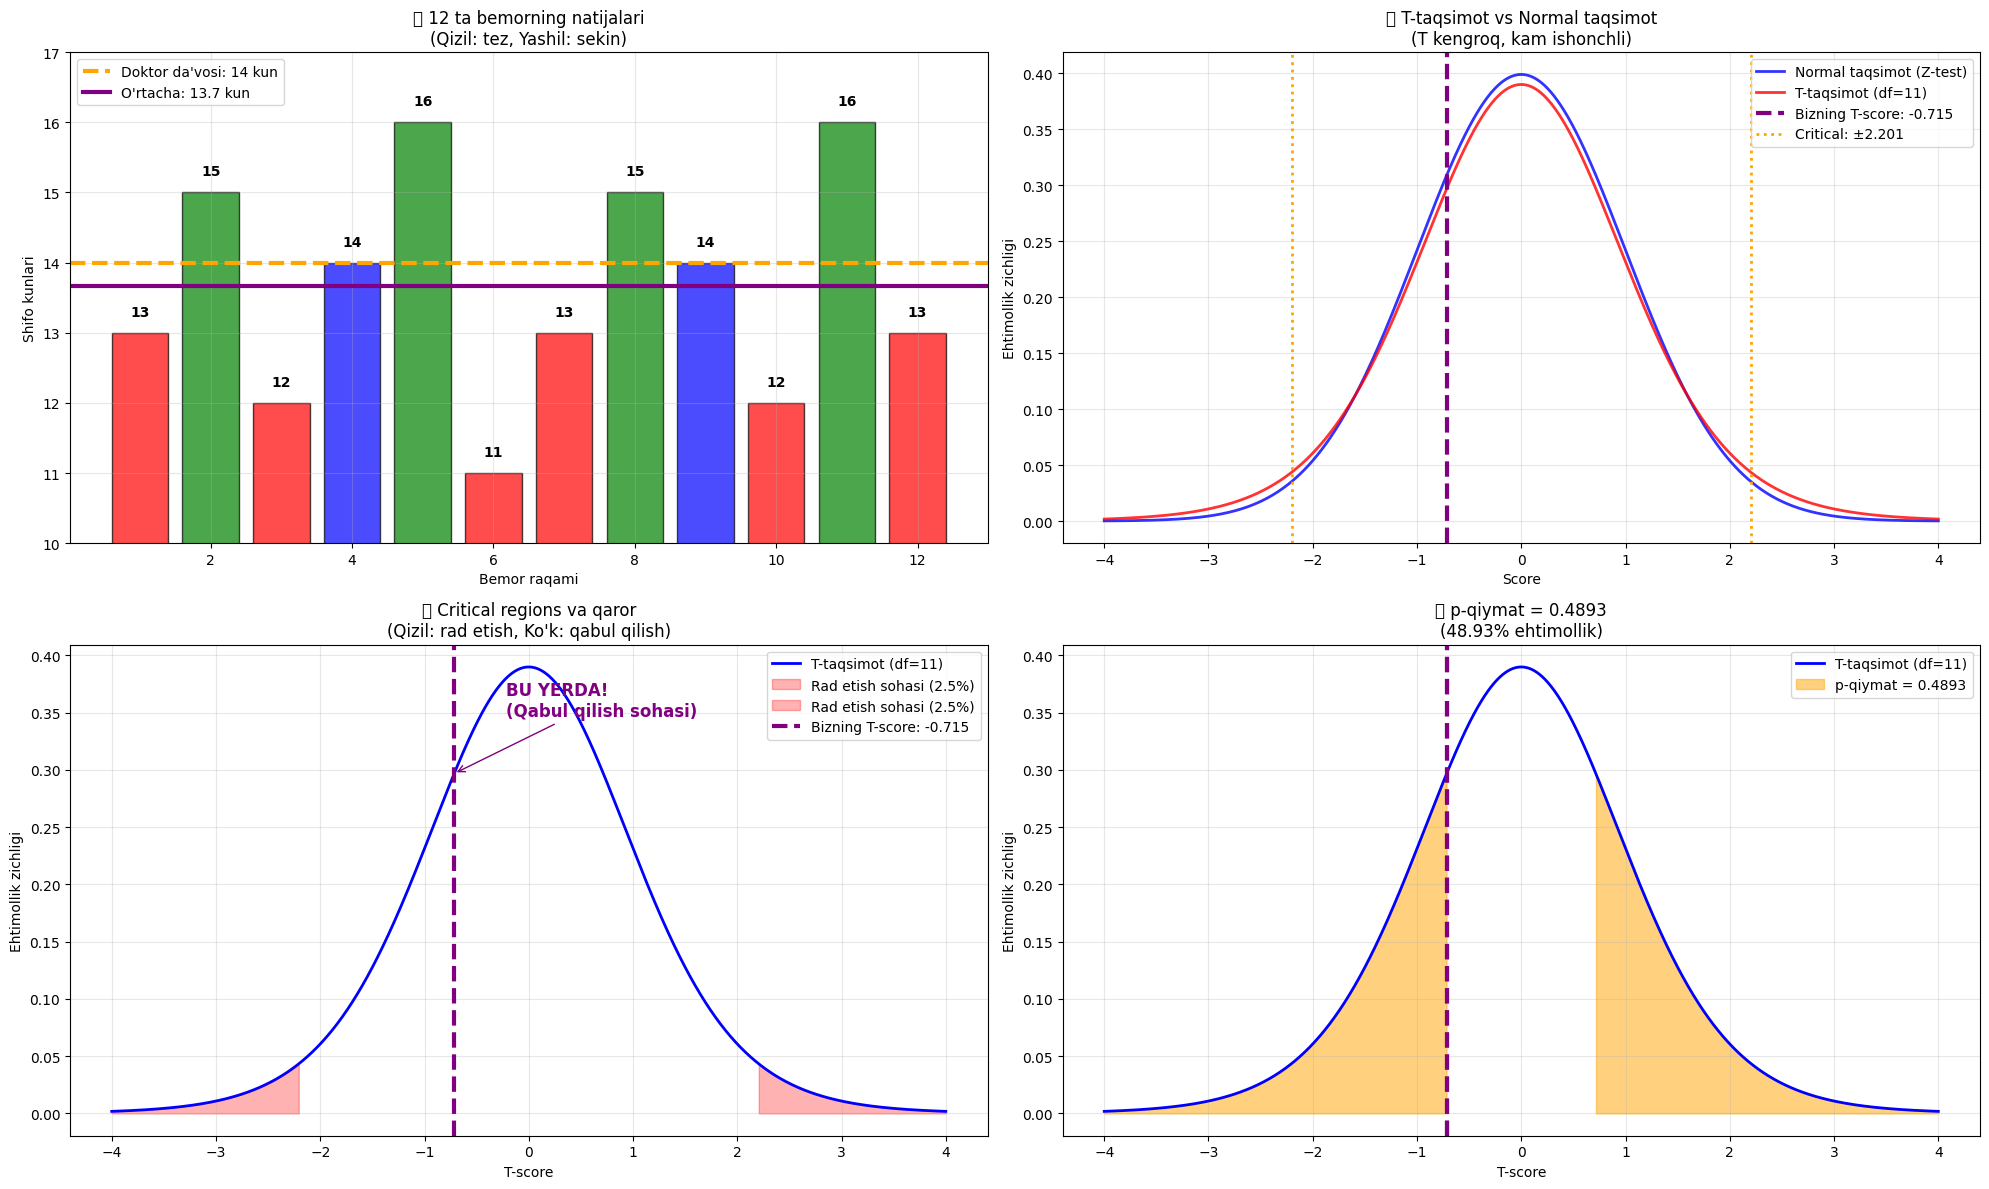


📖 GRAFIKLAR TUSHUNTIRISHI:
💊 1-GRAFIK (Bemorlar ma'lumotlari):
   • Har bir ustun = 1 ta bemor
   • Qizil ustunlar = tez shifo (14 kundan kam)
   • Yashil ustunlar = sekin shifo (14 kundan ko'p)
   • Binafsha chiziq = o'rtacha (13.7 kun)

📊 2-GRAFIK (T vs Normal):
   • Ko'k: Normal taqsimot (Z-test uchun)
   • Qizil: T-taqsimot (bizning holat)
   • T-taqsimot kengroq → kam ishonchli
   • df ortishi bilan T → Normal

🎯 3-GRAFIK (Critical regions):
   • Qizil sohalar: H₀ ni rad etish (5%)
   • Ko'k soha: H₀ ni qabul qilish (95%)
   • Bizning natija qabul qilish sohasida!
   • → Doktor to'g'ri!

🧮 4-GRAFIK (p-qiymat):
   • Apelsin sohalar: p = 0.4893
   • Bu degani: 48.93% ehtimollik
   • Agar H₀ to'g'ri bo'lsa, bizning natijani olish ehtimoli
   • 5% dan ko'p → H₀ ni qabul qilamiz!


In [37]:
# 🎨 DORI SINOVI NATIJALARINI VIZUALIZATSIYA
print("\n" + "="*50)
print("🎨 T-TEST GRAFIKLAR ORQALI TUSHUNISH")
print("="*50)

# 4 ta grafik yaratamiz
fig = plt.figure(figsize=(20, 12))

# 1. BEMORLAR MA'LUMOTLARI
ax1 = plt.subplot(2, 2, 1)
# Har bir bemorning natijasini ko'rsatish
patient_ids = range(1, len(data) + 1)
colors = ['red' if x < mu_0 else 'green' if x > mu_0 else 'blue' for x in data]

bars = ax1.bar(patient_ids, data, color=colors, alpha=0.7, edgecolor='black')
ax1.axhline(mu_0, color='orange', linestyle='--', linewidth=3, label=f'Doktor da\'vosi: {mu_0} kun')
ax1.axhline(x_bar, color='purple', linestyle='-', linewidth=3, label=f'O\'rtacha: {x_bar:.1f} kun')

# Har bir bemor ustiga qiymat yozish
for i, v in enumerate(data):
    ax1.text(i+1, v+0.2, str(v), ha='center', va='bottom', fontweight='bold')

ax1.set_xlabel('Bemor raqami')
ax1.set_ylabel('Shifo kunlari')
ax1.set_title('💊 12 ta bemorning natijalari\n(Qizil: tez, Yashil: sekin)')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(10, 17)

# 2. T-TAQSIMOT VS NORMAL TAQSIMOT TAQQOSLASH
ax2 = plt.subplot(2, 2, 2)
x_range = np.linspace(-4, 4, 1000)

# Normal taqsimot
normal_y = norm.pdf(x_range, 0, 1)
ax2.plot(x_range, normal_y, 'b-', linewidth=2, label='Normal taqsimot (Z-test)', alpha=0.8)

# T-taqsimot
t_y = t.pdf(x_range, df)
ax2.plot(x_range, t_y, 'r-', linewidth=2, label=f'T-taqsimot (df={df})', alpha=0.8)

# Bizning T-score
ax2.axvline(t_score, color='purple', linestyle='--', linewidth=3, 
            label=f'Bizning T-score: {t_score:.3f}')

# Critical regions
ax2.axvline(critical_value, color='orange', linestyle=':', linewidth=2, 
            label=f'Critical: ±{critical_value:.3f}')
ax2.axvline(-critical_value, color='orange', linestyle=':', linewidth=2)

ax2.set_xlabel('Score')
ax2.set_ylabel('Ehtimollik zichligi')
ax2.set_title('📊 T-taqsimot vs Normal taqsimot\n(T kengroq, kam ishonchli)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. CRITICAL REGIONS VA QAROR
ax3 = plt.subplot(2, 2, 3)
ax3.plot(x_range, t_y, 'b-', linewidth=2, label=f'T-taqsimot (df={df})')

# Critical regions
x_left_crit = x_range[x_range <= -critical_value]
y_left_crit = t.pdf(x_left_crit, df)
x_right_crit = x_range[x_range >= critical_value]
y_right_crit = t.pdf(x_right_crit, df)

ax3.fill_between(x_left_crit, y_left_crit, alpha=0.3, color='red', label='Rad etish sohasi (2.5%)')
ax3.fill_between(x_right_crit, y_right_crit, alpha=0.3, color='red', label='Rad etish sohasi (2.5%)')

# Bizning T-score pozitsiyasi
ax3.axvline(t_score, color='purple', linestyle='--', linewidth=3, 
            label=f'Bizning T-score: {t_score:.3f}')

# Annotatsiya
if abs(t_score) > critical_value:
    ax3.annotate('BU YERDA!\n(Rad etish sohasi)', 
                xy=(t_score, t.pdf(t_score, df)), 
                xytext=(t_score-1, t.pdf(t_score, df)+0.05),
                arrowprops=dict(arrowstyle='->', color='purple'), 
                fontsize=12, color='purple', fontweight='bold')
else:
    ax3.annotate('BU YERDA!\n(Qabul qilish sohasi)', 
                xy=(t_score, t.pdf(t_score, df)), 
                xytext=(t_score+0.5, t.pdf(t_score, df)+0.05),
                arrowprops=dict(arrowstyle='->', color='purple'), 
                fontsize=12, color='purple', fontweight='bold')

ax3.set_xlabel('T-score')
ax3.set_ylabel('Ehtimollik zichligi')
ax3.set_title('🎯 Critical regions va qaror\n(Qizil: rad etish, Ko\'k: qabul qilish)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. p-QIYMAT VIZUALIZATSIYASI
ax4 = plt.subplot(2, 2, 4)
ax4.plot(x_range, t_y, 'b-', linewidth=2, label=f'T-taqsimot (df={df})')

# p-qiymat sohalarini to'ldirish
x_p_left = x_range[x_range <= -abs(t_score)]
y_p_left = t.pdf(x_p_left, df)
x_p_right = x_range[x_range >= abs(t_score)]
y_p_right = t.pdf(x_p_right, df)

ax4.fill_between(x_p_left, y_p_left, alpha=0.5, color='orange', 
                label=f'p-qiymat = {p_value:.4f}')
ax4.fill_between(x_p_right, y_p_right, alpha=0.5, color='orange')

ax4.axvline(t_score, color='purple', linestyle='--', linewidth=3)
ax4.axvline(-abs(t_score), color='purple', linestyle='--', linewidth=3, alpha=0.5)

ax4.set_xlabel('T-score')
ax4.set_ylabel('Ehtimollik zichligi')
ax4.set_title(f'🎯 p-qiymat = {p_value:.4f}\n({p_value*100:.2f}% ehtimollik)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# GRAFIKLAR TUSHUNTIRISHI
print("\n📖 GRAFIKLAR TUSHUNTIRISHI:")
print("="*35)
print("💊 1-GRAFIK (Bemorlar ma'lumotlari):")
print("   • Har bir ustun = 1 ta bemor")
print("   • Qizil ustunlar = tez shifo (14 kundan kam)")
print("   • Yashil ustunlar = sekin shifo (14 kundan ko'p)")
print(f"   • Binafsha chiziq = o'rtacha ({x_bar:.1f} kun)")
print()

print("📊 2-GRAFIK (T vs Normal):")
print("   • Ko'k: Normal taqsimot (Z-test uchun)")
print("   • Qizil: T-taqsimot (bizning holat)")
print("   • T-taqsimot kengroq → kam ishonchli")
print("   • df ortishi bilan T → Normal")
print()

print("🎯 3-GRAFIK (Critical regions):")
print("   • Qizil sohalar: H₀ ni rad etish (5%)")
print("   • Ko'k soha: H₀ ni qabul qilish (95%)")
if abs(t_score) > critical_value:
    print("   • Bizning natija rad etish sohasida!")
    print("   • → Doktor noto'g'ri!")
else:
    print("   • Bizning natija qabul qilish sohasida!")
    print("   • → Doktor to'g'ri!")
print()

print("🧮 4-GRAFIK (p-qiymat):")
print(f"   • Apelsin sohalar: p = {p_value:.4f}")
print(f"   • Bu degani: {p_value*100:.2f}% ehtimollik")
print("   • Agar H₀ to'g'ri bo'lsa, bizning natijani olish ehtimoli")
if p_value < 0.05:
    print("   • 5% dan kam → H₀ ni rad etamiz!")
else:
    print("   • 5% dan ko'p → H₀ ni qabul qilamiz!")

## 4. 🍕 Chi-Square Test: Pizza va jins hikoyasi

### 🍽️ Hikoya: Restoran so'rovi

Tasavvur qiling, siz restoran egasisiz. Sizda savol:
> "Erkaklar va ayollar bir xil ovqatni yeyishni yoqtiradimi?"

Bu savol **raqamlar** bilan emas, **kategoriyalar** bilan bog'liq!
- Jins: Erkak/Ayol 
- Ovqat: Pizza/Salat/Burger

Bu **Chi-Square test** uchun!

### 🔍 Chi-Square test qachon ishlatiladi?

**Chi-Square (χ²)** - bu kategorik ma'lumotlar uchun:
- 📊 **Kategoriyalar**: Raqam emas, guruhlar (Erkak/Ayol, Pizza/Salat)
- 🔗 **Bog'lanish tekshirish**: Ikki narsa bog'langan-mi?
- 📈 **Chastotalar**: Necha kishi nima tanlagan?

### 🤔 Z-test, T-test, Chi-Square farqi:

| Test | Ma'lumot turi | Maqsad | Misol |
|------|---------------|--------|--------|
| **Z-test** | Raqamli (ko'p) | O'rtachalarni taqqoslash | Shokolad og'irligi |
| **T-test** | Raqamli (kam) | O'rtachalarni taqqoslash | Dori samaradorligi |
| **Chi-Square** | Kategorik | Bog'lanish tekshirish | Jins ↔ Ovqat tanlovi |

### 🧮 Chi-Square formulasi:

**Asosiy g'oya:** Kuzatilgan vs Kutilgan farqini o'lchash

$$χ² = \sum \frac{(O_i - E_i)²}{E_i}$$

**Oddiy tushuntirish:**
```
χ² = Σ (Haqiqiy - Kutilgan)² / Kutilgan
```

**Har bir belgining ma'nosi:**
- **χ²** = Chi-Square statistik (bizning natijamiz)
- **O** = Observed (Haqiqatda kuzatilgan)
- **E** = Expected (Kutilgan, agar bog'lanish bo'lmasa)
- **Σ** = Hammasi yig'indisi

### 📊 Contingency Table (Jadvali):

Bu eng muhim qism! Masalan:

|        | Pizza | Salat | Burger | Jami |
|--------|-------|-------|--------|------|
| Erkak  |   ?   |   ?   |    ?   |  ?   |
| Ayol   |   ?   |   ?   |    ?   |  ?   |
| Jami   |   ?   |   ?   |    ?   |  ?   |

### 🎯 Chi-Square test bosqichlari:

```
1. 📝 JADVAL: Contingency table yasash
2. 🧮 KUTILGAN: Expected frequencies hisoblash
3. 📊 CHI-SQUARE: χ² statistik hisoblash
4. 🤔 QAROR: Bog'lanish bor/yo'q
```

### 💡 "Degrees of Freedom" Chi-Square da:

```
df = (rows - 1) × (columns - 1)
df = (2 - 1) × (3 - 1) = 1 × 2 = 2
```

**Oddiy tushuntirish:**
- 2 jins (Erkak/Ayol) - 1 = 1
- 3 ovqat (Pizza/Salat/Burger) - 1 = 2
- df = 1 × 2 = 2

In [38]:
# 🍕 RESTORAN SO'ROVI CHI-SQUARE TEST MISOLI
print("🍽️ RESTORAN MIJOZLARI SO'ROVI")
print("=" * 35)

# 📋 VAZIYAT
print("📋 VAZIYAT:")
print("   Restoran egasi: 'Erkaklar va ayollar bir xil ovqat yeyishadi!'")
print("   Siz: 'Men buni tekshirmoqchiman!'")
print()

# 📊 SO'ROV NATIJALARI
print("📊 180 MIJOZDAN SO'ROV NATIJALARI:")

# Real data - Haqiqatda kuzatilgan (Observed)
observed_data = {
    'Pizza': [45, 25],  # [Erkak, Ayol]
    'Salat': [15, 35],  # [Erkak, Ayol] 
    'Burger': [40, 20]  # [Erkak, Ayol]
}

contingency_table = pd.DataFrame(observed_data, index=['Erkak', 'Ayol'])
print(contingency_table)
print()

# Jami hisoblar
total_male = contingency_table.loc['Erkak'].sum()
total_female = contingency_table.loc['Ayol'].sum()
total_pizza = contingency_table['Pizza'].sum()
total_salat = contingency_table['Salat'].sum() 
total_burger = contingency_table['Burger'].sum()
grand_total = contingency_table.sum().sum()

print("📈 JAMI HISOBLAR:")
print(f"   • Erkaklar jami: {total_male}")
print(f"   • Ayollar jami: {total_female}")
print(f"   • Pizza sevuvchilar: {total_pizza}")
print(f"   • Salat sevuvchilar: {total_salat}")
print(f"   • Burger sevuvchilar: {total_burger}")
print(f"   • Jami mijozlar: {grand_total}")
print()

# 🤔 HIPOTEZALAR
print("🤔 HIPOTEZALAR:")
print("   H₀: Jins va ovqat tanlovi mustaqil (bog'lanish yo'q)")
print("   H₁: Jins va ovqat tanlovi bog'langan")
print("   α = 0.05 = 5%")
print()

# 🧮 KUTILGAN CHASTOTALARNI HISOBLASH (qadamba-qadam)
print("🧮 KUTILGAN CHASTOTALAR (agar bog'lanish bo'lmasa):")
print("   Formula: Expected = (Row Total × Column Total) / Grand Total")
print()

expected = np.zeros((2, 3))

# Erkak-Pizza
exp_male_pizza = (total_male * total_pizza) / grand_total
expected[0, 0] = exp_male_pizza
print(f"   Erkak-Pizza: ({total_male} × {total_pizza}) ÷ {grand_total} = {exp_male_pizza:.1f}")

# Erkak-Salat  
exp_male_salat = (total_male * total_salat) / grand_total
expected[0, 1] = exp_male_salat
print(f"   Erkak-Salat: ({total_male} × {total_salat}) ÷ {grand_total} = {exp_male_salat:.1f}")

# Erkak-Burger
exp_male_burger = (total_male * total_burger) / grand_total  
expected[0, 2] = exp_male_burger
print(f"   Erkak-Burger: ({total_male} × {total_burger}) ÷ {grand_total} = {exp_male_burger:.1f}")

# Ayol-Pizza
exp_female_pizza = (total_female * total_pizza) / grand_total
expected[1, 0] = exp_female_pizza
print(f"   Ayol-Pizza: ({total_female} × {total_pizza}) ÷ {grand_total} = {exp_female_pizza:.1f}")

# Ayol-Salat
exp_female_salat = (total_female * total_salat) / grand_total
expected[1, 1] = exp_female_salat
print(f"   Ayol-Salat: ({total_female} × {total_salat}) ÷ {grand_total} = {exp_female_salat:.1f}")

# Ayol-Burger
exp_female_burger = (total_female * total_burger) / grand_total
expected[1, 2] = exp_female_burger
print(f"   Ayol-Burger: ({total_female} × {total_burger}) ÷ {grand_total} = {exp_female_burger:.1f}")

print()
expected_df = pd.DataFrame(expected, 
                          index=['Erkak', 'Ayol'], 
                          columns=['Pizza', 'Salat', 'Burger'])
print("📊 KUTILGAN CHASTOTALAR JADVALI:")
print(expected_df.round(1))
print()

# CHI-SQUARE HISOBLASH (qadamba-qadam)
print("🔢 CHI-SQUARE HISOBLASH (har bir katak uchun):")
print("   Formula har bir katak uchun: (Observed - Expected)² / Expected")
print()

observed_flat = contingency_table.values.flatten()
expected_flat = expected.flatten()
chi_square_components = []

labels = ['Erkak-Pizza', 'Erkak-Salat', 'Erkak-Burger', 
          'Ayol-Pizza', 'Ayol-Salat', 'Ayol-Burger']

chi2_manual = 0
for i, label in enumerate(labels):
    obs = observed_flat[i]
    exp = expected_flat[i]
    component = (obs - exp)**2 / exp
    chi_square_components.append(component)
    chi2_manual += component
    
    print(f"   {label}: ({obs} - {exp:.1f})² / {exp:.1f} = {(obs-exp):.1f}² / {exp:.1f} = {component:.3f}")

print(f"\n   χ² = {' + '.join([f'{comp:.3f}' for comp in chi_square_components])}")
print(f"   χ² = {chi2_manual:.3f}")
print()

# Degrees of freedom
df = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
print(f"📐 DEGREES OF FREEDOM:")
print(f"   df = (rows - 1) × (columns - 1)")
print(f"   df = ({contingency_table.shape[0]} - 1) × ({contingency_table.shape[1]} - 1)")
print(f"   df = {contingency_table.shape[0] - 1} × {contingency_table.shape[1] - 1} = {df}")
print()

# p-qiymat va critical value
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, df)
p_value = 1 - chi2.cdf(chi2_manual, df)

print(f"📊 NATIJALAR:")
print(f"   • χ² = {chi2_manual:.3f}")
print(f"   • df = {df}")
print(f"   • p-qiymat = {p_value:.4f} = {p_value*100:.2f}%")
print(f"   • Critical value = {critical_value:.3f}")
print()

# Scipy bilan tekshirish
chi2_scipy, p_scipy, dof_scipy, expected_scipy = stats.chi2_contingency(contingency_table)
print(f"🔬 SCIPY BILAN TEKSHIRISH:")
print(f"   • χ² = {chi2_scipy:.3f}")
print(f"   • p-value = {p_scipy:.4f}")
print("   ✅ Bizning hisoblash to'g'ri!")
print()

# YAKUNIY QAROR
print("🎯 YAKUNIY QAROR:")
print(f"   • χ² = {chi2_manual:.3f}")
print(f"   • Critical = {critical_value:.3f}")
print(f"   • χ² {'>' if chi2_manual > critical_value else '<'} Critical → ", end="")
if chi2_manual > critical_value:
    print("H₀ ni rad etamiz")
else:
    print("H₀ ni rad eta olmaymiz")
print()

print(f"   • p-value = {p_value:.4f}")
print(f"   • α = {alpha}")
print(f"   • p {'<' if p_value < alpha else '>'} α → ", end="")
if p_value < alpha:
    print("Statistik jihatdan ahamiyatli bog'lanish!")
else:
    print("Statistik jihatdan ahamiyatsiz")
print()

if p_value < alpha:
    print("   ✅ JINS VA OVQAT TANLOVI BOG'LANGAN!")
    print("   ✅ Erkaklar va ayollar har xil ovqat yeyishni yoqtiradi!")
    print("   ✅ Masalan: Ayollar ko'proq salat, erkaklar ko'proq pizza!")
else:
    print("   ❌ JINS VA OVQAT TANLOVI MUSTAQIL!")
    print("   ❌ Erkaklar va ayollar bir xil ovqat yeyishadi!")
    print("   ❌ Farqlar tasodifiy!")

🍽️ RESTORAN MIJOZLARI SO'ROVI
📋 VAZIYAT:
   Restoran egasi: 'Erkaklar va ayollar bir xil ovqat yeyishadi!'
   Siz: 'Men buni tekshirmoqchiman!'

📊 180 MIJOZDAN SO'ROV NATIJALARI:
       Pizza  Salat  Burger
Erkak     45     15      40
Ayol      25     35      20

📈 JAMI HISOBLAR:
   • Erkaklar jami: 100
   • Ayollar jami: 80
   • Pizza sevuvchilar: 70
   • Salat sevuvchilar: 50
   • Burger sevuvchilar: 60
   • Jami mijozlar: 180

🤔 HIPOTEZALAR:
   H₀: Jins va ovqat tanlovi mustaqil (bog'lanish yo'q)
   H₁: Jins va ovqat tanlovi bog'langan
   α = 0.05 = 5%

🧮 KUTILGAN CHASTOTALAR (agar bog'lanish bo'lmasa):
   Formula: Expected = (Row Total × Column Total) / Grand Total

   Erkak-Pizza: (100 × 70) ÷ 180 = 38.9
   Erkak-Salat: (100 × 50) ÷ 180 = 27.8
   Erkak-Burger: (100 × 60) ÷ 180 = 33.3
   Ayol-Pizza: (80 × 70) ÷ 180 = 31.1
   Ayol-Salat: (80 × 50) ÷ 180 = 22.2
   Ayol-Burger: (80 × 60) ÷ 180 = 26.7

📊 KUTILGAN CHASTOTALAR JADVALI:
       Pizza  Salat  Burger
Erkak   38.9   27.8    3


🎨 CHI-SQUARE GRAFIKLAR ORQALI TUSHUNISH


/Users/bnutfilloyev/Developer/lesson/venv/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_90876/3714214865.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(categories, rotation=45)
/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_90876/3714214865.py:122: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_90876/3714214865.py:122: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_90876/3714214865.py:122: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  plt

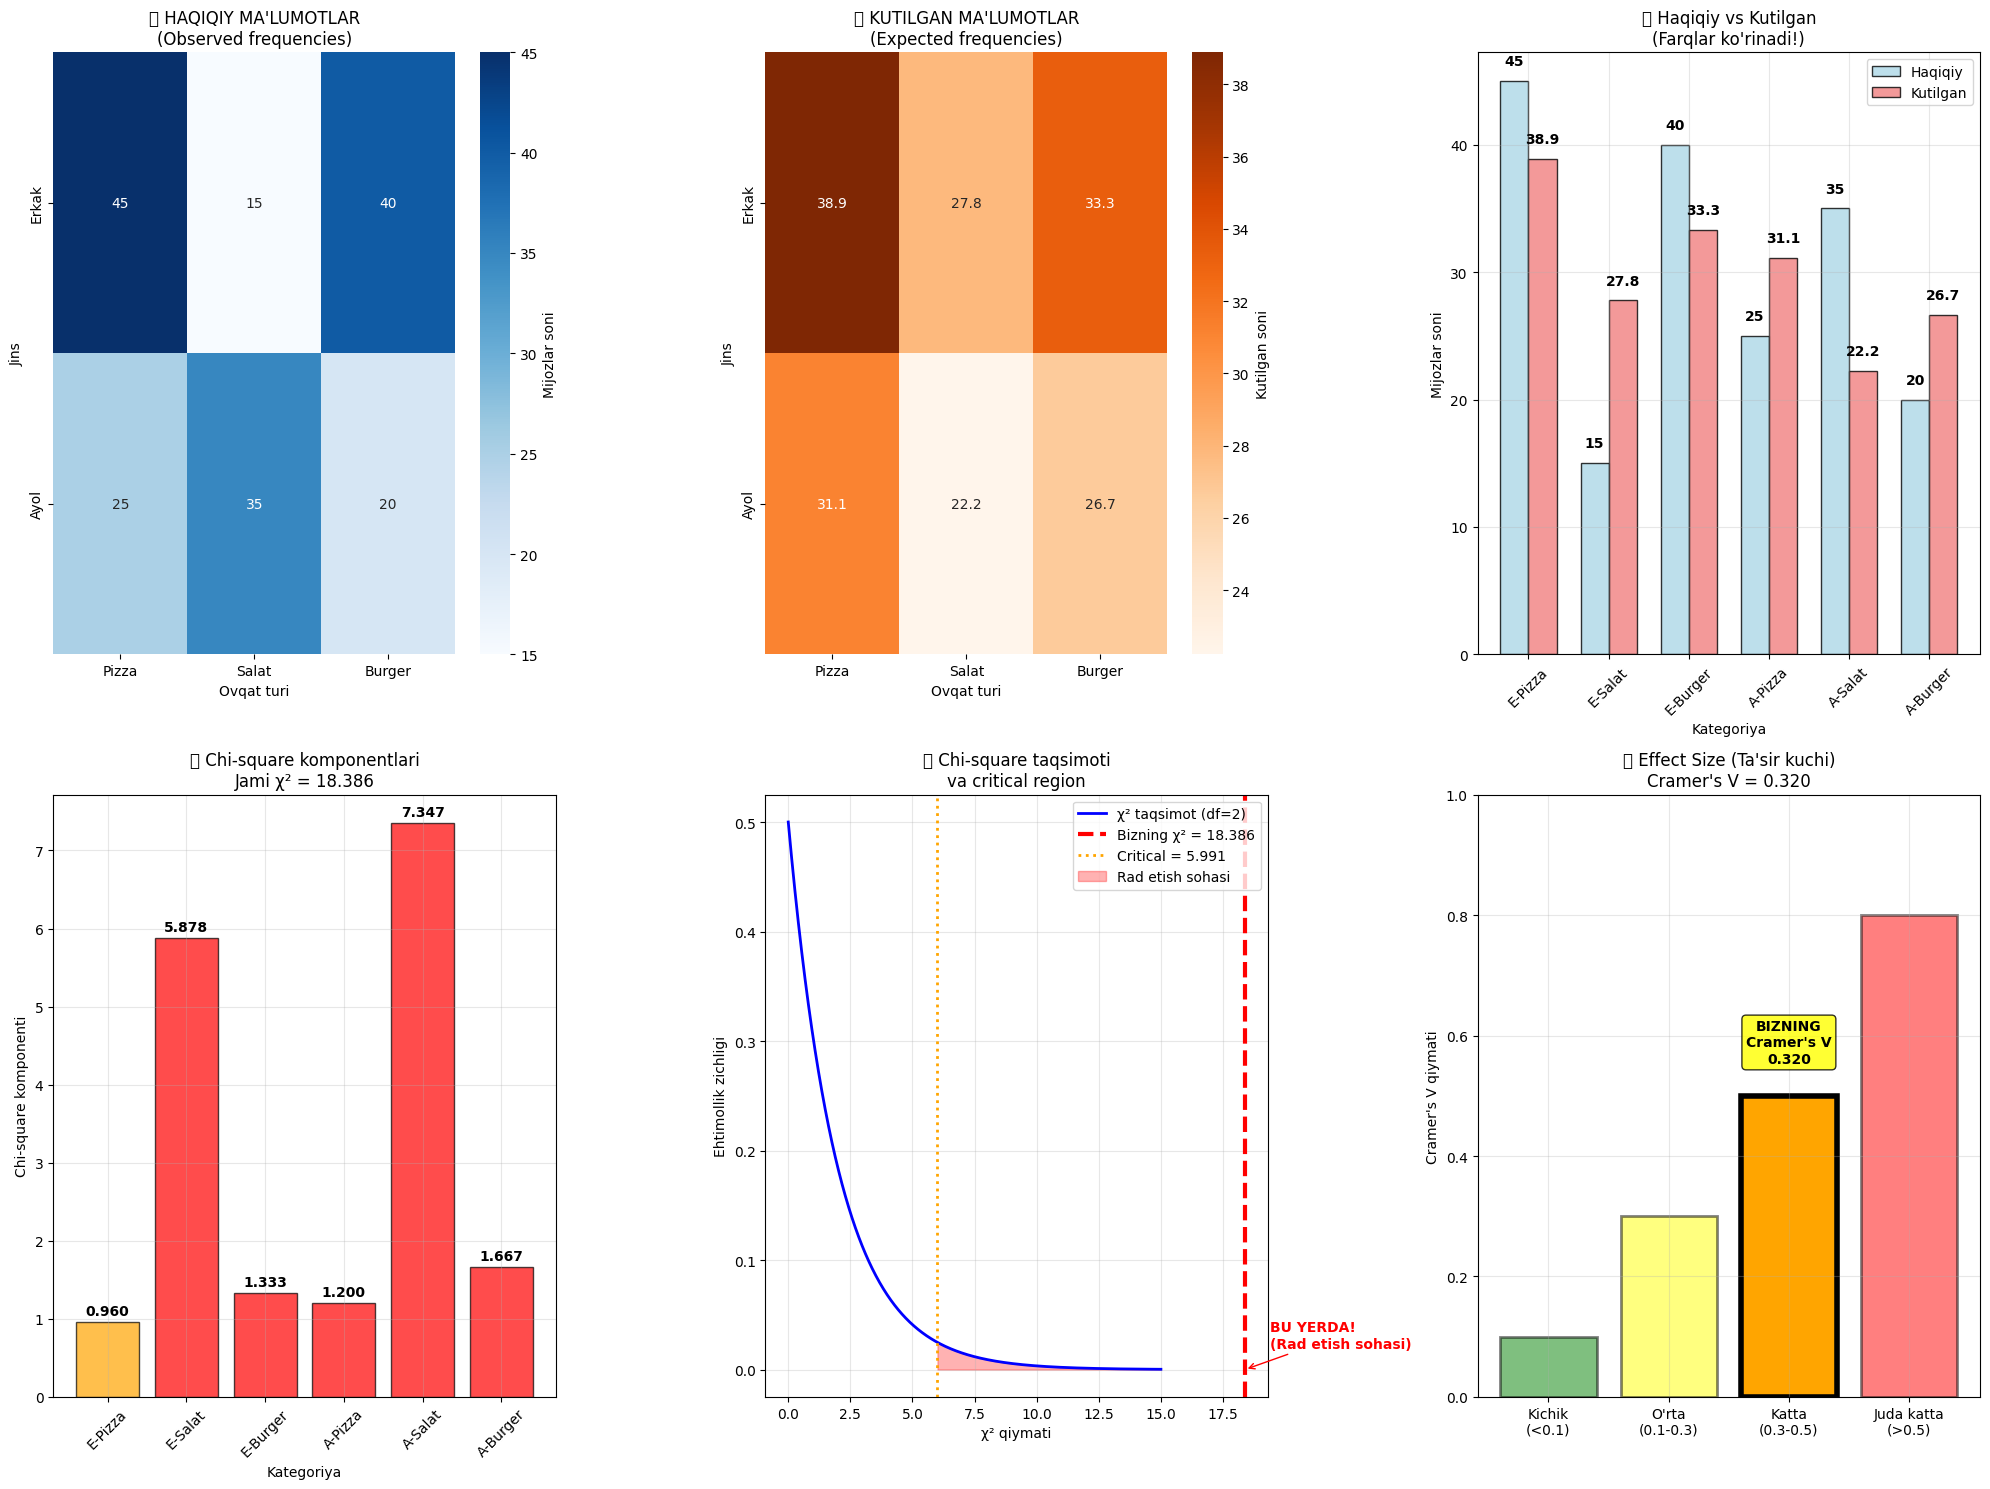


📖 GRAFIKLAR TUSHUNTIRISHI:
📊 1-GRAFIK (Haqiqiy ma'lumotlar):
   • Ko'k ranglar: Mijozlar soni
   • Qoyuq ko'k: Ko'p mijoz
   • Och ko'k: Kam mijoz

🧮 2-GRAFIK (Kutilgan ma'lumotlar):
   • Apelsin ranglar: Agar bog'lanish bo'lmasa
   • Hammasi teng bo'lishi kerak edi
   • Lekin farqlar bor!

📈 3-GRAFIK (Taqqoslash):
   • Ko'k: Haqiqiy natijalar
   • Qizil: Kutilgan natijalar
   • Katta farqlar = Bog'lanish bor!

🔢 4-GRAFIK (Chi-square komponentlari):
   • Har bir rang: Farq darajasi
   • Qizil: Juda katta farq
   • Yashil: Kichik farq
   • Jami χ² = 18.386

📊 5-GRAFIK (Chi-square taqsimoti):
   • Ko'k chiziq: χ² taqsimot (df=2)
   • Qizil: Bizning natija (18.386)
   • Qizil soha: Rad etish zonasi
   • Bizning natija rad etish zonasida!

📏 6-GRAFIK (Effect size):
   • Cramer's V = 0.320
   • Bu katta ta'sir!
   • Amaliy jihatdan qanchalik muhim?


In [39]:
# 🎨 CHI-SQUARE TEST NATIJALARINI VIZUALIZATSIYA
print("\n" + "="*50)
print("🎨 CHI-SQUARE GRAFIKLAR ORQALI TUSHUNISH")
print("="*50)

# 6 ta grafik yaratamiz
fig = plt.figure(figsize=(20, 15))

# 1. OBSERVED (HAQIQIY) MA'LUMOTLAR HEATMAP
ax1 = plt.subplot(2, 3, 1)
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', 
            cbar_kws={'label': 'Mijozlar soni'}, ax=ax1)
ax1.set_title('📊 HAQIQIY MA\'LUMOTLAR\n(Observed frequencies)')
ax1.set_ylabel('Jins')
ax1.set_xlabel('Ovqat turi')

# 2. EXPECTED (KUTILGAN) MA'LUMOTLAR HEATMAP  
ax2 = plt.subplot(2, 3, 2)
sns.heatmap(expected_df, annot=True, fmt='.1f', cmap='Oranges',
            cbar_kws={'label': 'Kutilgan soni'}, ax=ax2)
ax2.set_title('🧮 KUTILGAN MA\'LUMOTLAR\n(Expected frequencies)')
ax2.set_ylabel('Jins')
ax2.set_xlabel('Ovqat turi')

# 3. OBSERVED VS EXPECTED TAQQOSLASH
ax3 = plt.subplot(2, 3, 3)
categories = ['E-Pizza', 'E-Salat', 'E-Burger', 'A-Pizza', 'A-Salat', 'A-Burger']
x_pos = np.arange(len(categories))

width = 0.35
bars1 = ax3.bar(x_pos - width/2, observed_flat, width, label='Haqiqiy', 
                color='lightblue', alpha=0.8, edgecolor='black')
bars2 = ax3.bar(x_pos + width/2, expected_flat, width, label='Kutilgan', 
                color='lightcoral', alpha=0.8, edgecolor='black')

# Qiymatlarni ustiga yozish
for i, (obs, exp) in enumerate(zip(observed_flat, expected_flat)):
    ax3.text(i - width/2, obs + 1, str(int(obs)), ha='center', va='bottom', fontweight='bold')
    ax3.text(i + width/2, exp + 1, f'{exp:.1f}', ha='center', va='bottom', fontweight='bold')

ax3.set_xlabel('Kategoriya')
ax3.set_ylabel('Mijozlar soni')
ax3.set_title('📈 Haqiqiy vs Kutilgan\n(Farqlar ko\'rinadi!)')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(categories, rotation=45)
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. CHI-SQUARE KOMPONENTLARI
ax4 = plt.subplot(2, 3, 4)
colors = ['red' if comp > 1 else 'orange' if comp > 0.5 else 'green' for comp in chi_square_components]
bars = ax4.bar(categories, chi_square_components, color=colors, alpha=0.7, edgecolor='black')

# Qiymatlarni ustiga yozish
for i, comp in enumerate(chi_square_components):
    ax4.text(i, comp + 0.05, f'{comp:.3f}', ha='center', va='bottom', fontweight='bold')

ax4.set_xlabel('Kategoriya')
ax4.set_ylabel('Chi-square komponenti')
ax4.set_title(f'🔢 Chi-square komponentlari\nJami χ² = {chi2_manual:.3f}')
ax4.set_xticklabels(categories, rotation=45)
ax4.grid(True, alpha=0.3)

# 5. CHI-SQUARE TAQSIMOTI
ax5 = plt.subplot(2, 3, 5)
x_range = np.linspace(0, 15, 1000)
y_chi2 = chi2.pdf(x_range, df)

ax5.plot(x_range, y_chi2, 'b-', linewidth=2, label=f'χ² taqsimot (df={df})')
ax5.axvline(chi2_manual, color='red', linestyle='--', linewidth=3, 
            label=f'Bizning χ² = {chi2_manual:.3f}')
ax5.axvline(critical_value, color='orange', linestyle=':', linewidth=2, 
            label=f'Critical = {critical_value:.3f}')

# Critical region
x_critical = x_range[x_range >= critical_value]
y_critical = chi2.pdf(x_critical, df)
ax5.fill_between(x_critical, y_critical, alpha=0.3, color='red', 
                 label='Rad etish sohasi')

# Bizning pozitsiya
if chi2_manual > critical_value:
    ax5.annotate('BU YERDA!\n(Rad etish sohasi)', 
                xy=(chi2_manual, chi2.pdf(chi2_manual, df)), 
                xytext=(chi2_manual+1, chi2.pdf(chi2_manual, df)+0.02),
                arrowprops=dict(arrowstyle='->', color='red'), 
                fontsize=10, color='red', fontweight='bold')

ax5.set_xlabel('χ² qiymati')
ax5.set_ylabel('Ehtimollik zichligi')
ax5.set_title('📊 Chi-square taqsimoti\nva critical region')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. CRAMER'S V (EFFECT SIZE)
ax6 = plt.subplot(2, 3, 6)
n_total = grand_total
cramers_v = np.sqrt(chi2_manual / (n_total * (min(contingency_table.shape) - 1)))

effect_sizes = ['Kichik\n(<0.1)', 'O\'rta\n(0.1-0.3)', 'Katta\n(0.3-0.5)', 'Juda katta\n(>0.5)']
effect_values = [0.1, 0.3, 0.5, 0.8]
colors_effect = ['green', 'yellow', 'orange', 'red']

bars_effect = ax6.bar(effect_sizes, effect_values, color=colors_effect, alpha=0.5, 
                      edgecolor='black', linewidth=2)

# Bizning Cramer's V ni ko'rsatish
for i, val in enumerate(effect_values):
    if cramers_v <= val:
        bars_effect[i].set_alpha(1.0)
        bars_effect[i].set_linewidth(4)
        ax6.text(i, val + 0.05, f'BIZNING\nCramer\'s V\n{cramers_v:.3f}', 
                ha='center', va='bottom', fontweight='bold', 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))
        break

ax6.set_ylabel('Cramer\'s V qiymati')
ax6.set_title(f'📏 Effect Size (Ta\'sir kuchi)\nCramer\'s V = {cramers_v:.3f}')
ax6.set_ylim(0, 1)
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# GRAFIKLAR TUSHUNTIRISHI
print("\n📖 GRAFIKLAR TUSHUNTIRISHI:")
print("="*35)
print("📊 1-GRAFIK (Haqiqiy ma'lumotlar):")
print("   • Ko'k ranglar: Mijozlar soni")
print("   • Qoyuq ko'k: Ko'p mijoz")
print("   • Och ko'k: Kam mijoz")
print()

print("🧮 2-GRAFIK (Kutilgan ma'lumotlar):")
print("   • Apelsin ranglar: Agar bog'lanish bo'lmasa")
print("   • Hammasi teng bo'lishi kerak edi")
print("   • Lekin farqlar bor!")
print()

print("📈 3-GRAFIK (Taqqoslash):")
print("   • Ko'k: Haqiqiy natijalar")  
print("   • Qizil: Kutilgan natijalar")
print("   • Katta farqlar = Bog'lanish bor!")
print()

print("🔢 4-GRAFIK (Chi-square komponentlari):")
print("   • Har bir rang: Farq darajasi")
print("   • Qizil: Juda katta farq")
print("   • Yashil: Kichik farq")
print(f"   • Jami χ² = {chi2_manual:.3f}")
print()

print("📊 5-GRAFIK (Chi-square taqsimoti):")
print(f"   • Ko'k chiziq: χ² taqsimot (df={df})")
print(f"   • Qizil: Bizning natija ({chi2_manual:.3f})")
print("   • Qizil soha: Rad etish zonasi")
if chi2_manual > critical_value:
    print("   • Bizning natija rad etish zonasida!")
else:
    print("   • Bizning natija qabul qilish zonasida!")
print()

print("📏 6-GRAFIK (Effect size):")
print(f"   • Cramer's V = {cramers_v:.3f}")
if cramers_v < 0.1:
    effect_desc = "kichik"
elif cramers_v < 0.3:
    effect_desc = "o'rta"
elif cramers_v < 0.5:
    effect_desc = "katta"
else:
    effect_desc = "juda katta"
print(f"   • Bu {effect_desc} ta'sir!")
print("   • Amaliy jihatdan qanchalik muhim?")

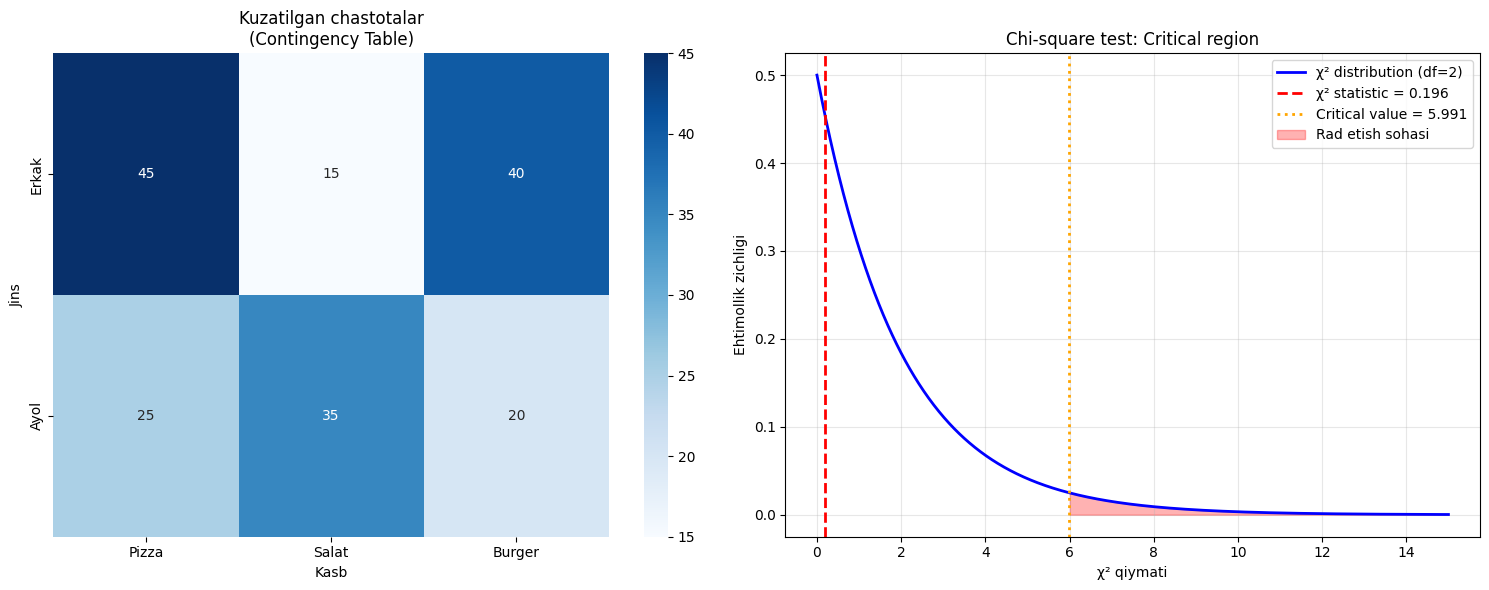


Effect size (Cramer's V) = 0.0330
Effect size interpretation: Juda kichik bog'lanish


In [40]:
# Chi-square test natijalarini vizualizatsiya qilish
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Contingency table heatmap
import seaborn as sns
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Kuzatilgan chastotalar\n(Contingency Table)')
ax1.set_ylabel('Jins')
ax1.set_xlabel('Kasb')

# Chi-square distribution
x = np.linspace(0, 15, 1000)
y = stats.chi2.pdf(x, dof)

ax2.plot(x, y, 'b-', linewidth=2, label=f'χ² distribution (df={dof})')
ax2.axvline(chi2_stat, color='red', linestyle='--', linewidth=2, 
            label=f'χ² statistic = {chi2_stat:.3f}')
ax2.axvline(critical_value, color='orange', linestyle=':', linewidth=2, 
            label=f'Critical value = {critical_value:.3f}')

# Critical region
x_critical = x[x >= critical_value]
y_critical = stats.chi2.pdf(x_critical, dof)
ax2.fill_between(x_critical, y_critical, alpha=0.3, color='red', 
                 label='Rad etish sohasi')

ax2.set_xlabel('χ² qiymati')
ax2.set_ylabel('Ehtimollik zichligi')
ax2.set_title('Chi-square test: Critical region')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Effect size (Cramer's V) hisoblash
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))
print(f"\nEffect size (Cramer's V) = {cramers_v:.4f}")

if cramers_v < 0.1:
    effect_size = "Juda kichik"
elif cramers_v < 0.3:
    effect_size = "Kichik"
elif cramers_v < 0.5:
    effect_size = "O'rta"
else:
    effect_size = "Katta"
    
print(f"Effect size interpretation: {effect_size} bog'lanish")

## 5. 🎓 Xulosa: Hipoteza testlari haqida hamma narsa

### 🌟 Nima o'rgandik?

Bugun biz **3 ta detektiv usuli** ni o'rgandik:
1. **Z-test** 🍫 - Ko'p ma'lumot bilan ishlaganda
2. **T-test** 💊 - Kam ma'lumot bilan ishlaganda  
3. **Chi-Square** 🍕 - Kategoriyalar bilan ishlaganda

### 🔍 Qaysi testni qachon ishlatish?

```
📊 MA'LUMOTINGIZ QANDAY?

├── RAQAMLI (og'irlik, balandlik, kun...)
│   ├── KO'P MA'LUMOT (30+) → Z-test 🍫
│   └── KAM MA'LUMOT (<30) → T-test 💊
│
└── KATEGORIK (jins, rang, kasb...)
    └── BOG'LANISH TEKSHIRISH → Chi-Square 🍕
```

### 📋 Testlar taqqoslash jadvali:

| Test | Ma'lumot | Maqsad | Formulaning mohiyati | Misol |
|------|----------|---------|---------------------|-------|
| **Z-test** | Raqamli (ko'p) | O'rtachani tekshirish | `(Natija - Da'vo) / Aniq_xatolik` | Shokolad fabrikasi |
| **T-test** | Raqamli (kam) | O'rtachani tekshirish | `(Natija - Da'vo) / Taxminiy_xatolik` | Dori sinovi |
| **Chi-Square** | Kategorik | Bog'lanish tekshirish | `Σ(Haqiqiy - Kutilgan)² / Kutilgan` | Restoran so'rovi |

### 🎯 Hipoteza testining asosiy qoidalari:

#### 1. **Hipotezalar (har doim 2 ta):**
- **H₀**: "Farq yo'q" yoki "Ta'sir yo'q" 
- **H₁**: "Farq bor" yoki "Ta'sir bor"

#### 2. **p-qiymat talqini:**
```
🟢 p > 0.05 → "Tasodif bo'lishi mumkin" → H₀ qabul
🟡 p = 0.05 → "Chegara" → Ehtiyot!
🔴 p < 0.05 → "Tasodif emas!" → H₀ rad
```

#### 3. **Qaror qabul qilish:**
```
✅ H₀ ni RAD ETAMIZ = "Dalil topildi!"
❌ H₀ ni RAD ETA OLMAYMIZ = "Dalil yetarli emas"
```

### 🧠 Amaliy maslahatlar:

#### 🔍 **Test tanlash:**
1. **Ma'lumot turini** aniqlang: Raqamli yoki Kategorik?
2. **Hajmini** tekshiring: Ko'p (30+) yoki Kam (<30)?
3. **Maqsadni** belgilang: O'rtacha yoki Bog'lanish?

#### 📊 **Natijalarni talqin qilish:**
1. **p-qiymat** ga qarang: 0.05 dan kichikmi?
2. **Effect size** ni hisobang: Amaliy jihatdan muhimmi?
3. **Grafik** chizing: Ko'zga ko'rinadigan farq bormi?

#### ⚠️ **Keng tarqalgan xatolar:**
- **Ma'lumot turi** ni noto'g'ri aniqlash
- **Sample size** ni e'tiborsiz qoldirish  
- **p-hacking**: Faqat p < 0.05 topguncha sinash
- **Effect size** ni unutish

### 🚀 Keyingi bosqichlar:

#### 📈 **Ilg'or mavzular:**
- **Power Analysis**: Test kuchi hisoblash
- **Multiple Testing**: Ko'p testlar bilan ishlash
- **Non-parametric Tests**: Normal bo'lmagan ma'lumotlar
- **ANOVA**: 3+ guruhni taqqoslash

#### 💡 **Amaliy qo'llanish:**
- **Biznes**: A/B testing, mijozlar tahlili
- **Tibbiyot**: Dori samaradorligi, kasallik tadqiqoti
- **Ta'lim**: O'qitish usullari, talabalar natijalari
- **Ijtimoiy fanlar**: So'rovlar, xulq-atvor tadqiqoti

### 🎮 Hipoteza testi - bu o'yin!

Har bir test - bu **detektiv o'yini**:
1. **Gumongo'y** (Hipoteza): "Men sizni aybdor deb o'ylayman!"
2. **Dalil yig'ish** (Ma'lumot): "Keling, tekshiramiz!"
3. **Tahlil qilish** (Hisoblash): "Matematik dalillar qanday?"
4. **Hukm chiqarish** (Qaror): "Aybdor yoki aybsiz?"

### 🌍 Hayotda qo'llanish:

**Kundalik misollar:**
- "Bu dori ishlaydimi?" → T-test
- "Erkaklar ayollarga qaraganda uzunroqmi?" → Z-test yoki T-test
- "Jins va kasb tanlovi bog'langanmi?" → Chi-Square
- "Yangi reklama samaralimi?" → A/B testing (Z-test)

### 💭 Muhim eslatma:

> **"Barcha modellar noto'g'ri, lekin ba'zilari foydali"** - George Box

Hipoteza testlari **mukammal emas**, lekin:
- **Ilmiy qarorlar** qabul qilishga yordam beradi
- **Objektiv tahlil** imkonini beradi  
- **Xatolarni** kamaytiradi
- **Dalilga asoslangan** fikrlashni rivojlantiradi

### 🎯 Yakuniy maslahat:

1. **Doim savol bering**: "Bu farq haqiqiymi yoki tasodifmi?"
2. **Ma'lumotlarni vizualizatsiya qiling**: Grafik 1000 ta so'zga teng!
3. **Effect size ni unutmang**: Statistik ≠ Amaliy ahamiyat
4. **Tanqidiy fikrlang**: Har doim alternativ tushuntirishlarni o'ylang

**Esda tuting**: Hipoteza testi - bu **ilmiy fikrlash** ning asosi! 🧬🔬

🎮 INTERAKTIV SIMULATSIYA: BARCHA TESTLAR
🔍 QAYSI TESTNI SINAB KO'RMOQCHISIZ?
1. Z-test (Fabrika simulatsiyasi)
2. T-test (Dori simulatsiyasi)
3. Chi-Square (Restoran simulatsiyasi)
4. Hammasi bir vaqtda!

🌟 BARCHA TESTLARNI BIR VAQTDA SIMULATSIYA QILAMIZ!

🍫 1. Z-TEST SIMULATSIYASI
-------------------------
   Fabrika to'g'ri: Z = -1.594, p = 0.1109
   Fabrika yolg'on: Z = -2.984, p = 0.0028

💊 2. T-TEST SIMULATSIYASI
-------------------------
   Dori to'g'ri: T = 1.378, p = 0.1957
   Dori yolg'on: T = -3.239, p = 0.0079

🍕 3. CHI-SQUARE SIMULATSIYASI
------------------------------
   Mustaqil: χ² = 0.000, p = 1.0000
   Bog'langan: χ² = 18.386, p = 0.0001


/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_90876/615356663.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, i].boxplot([samples], labels=[scenario["name"]])
/var/folders/kp/_7qjsy8s0lg8j_3vqs3w_jzm0000gn/T/ipykernel_90876/615356663.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, i].boxplot([samples], labels=[scenario["name"]])


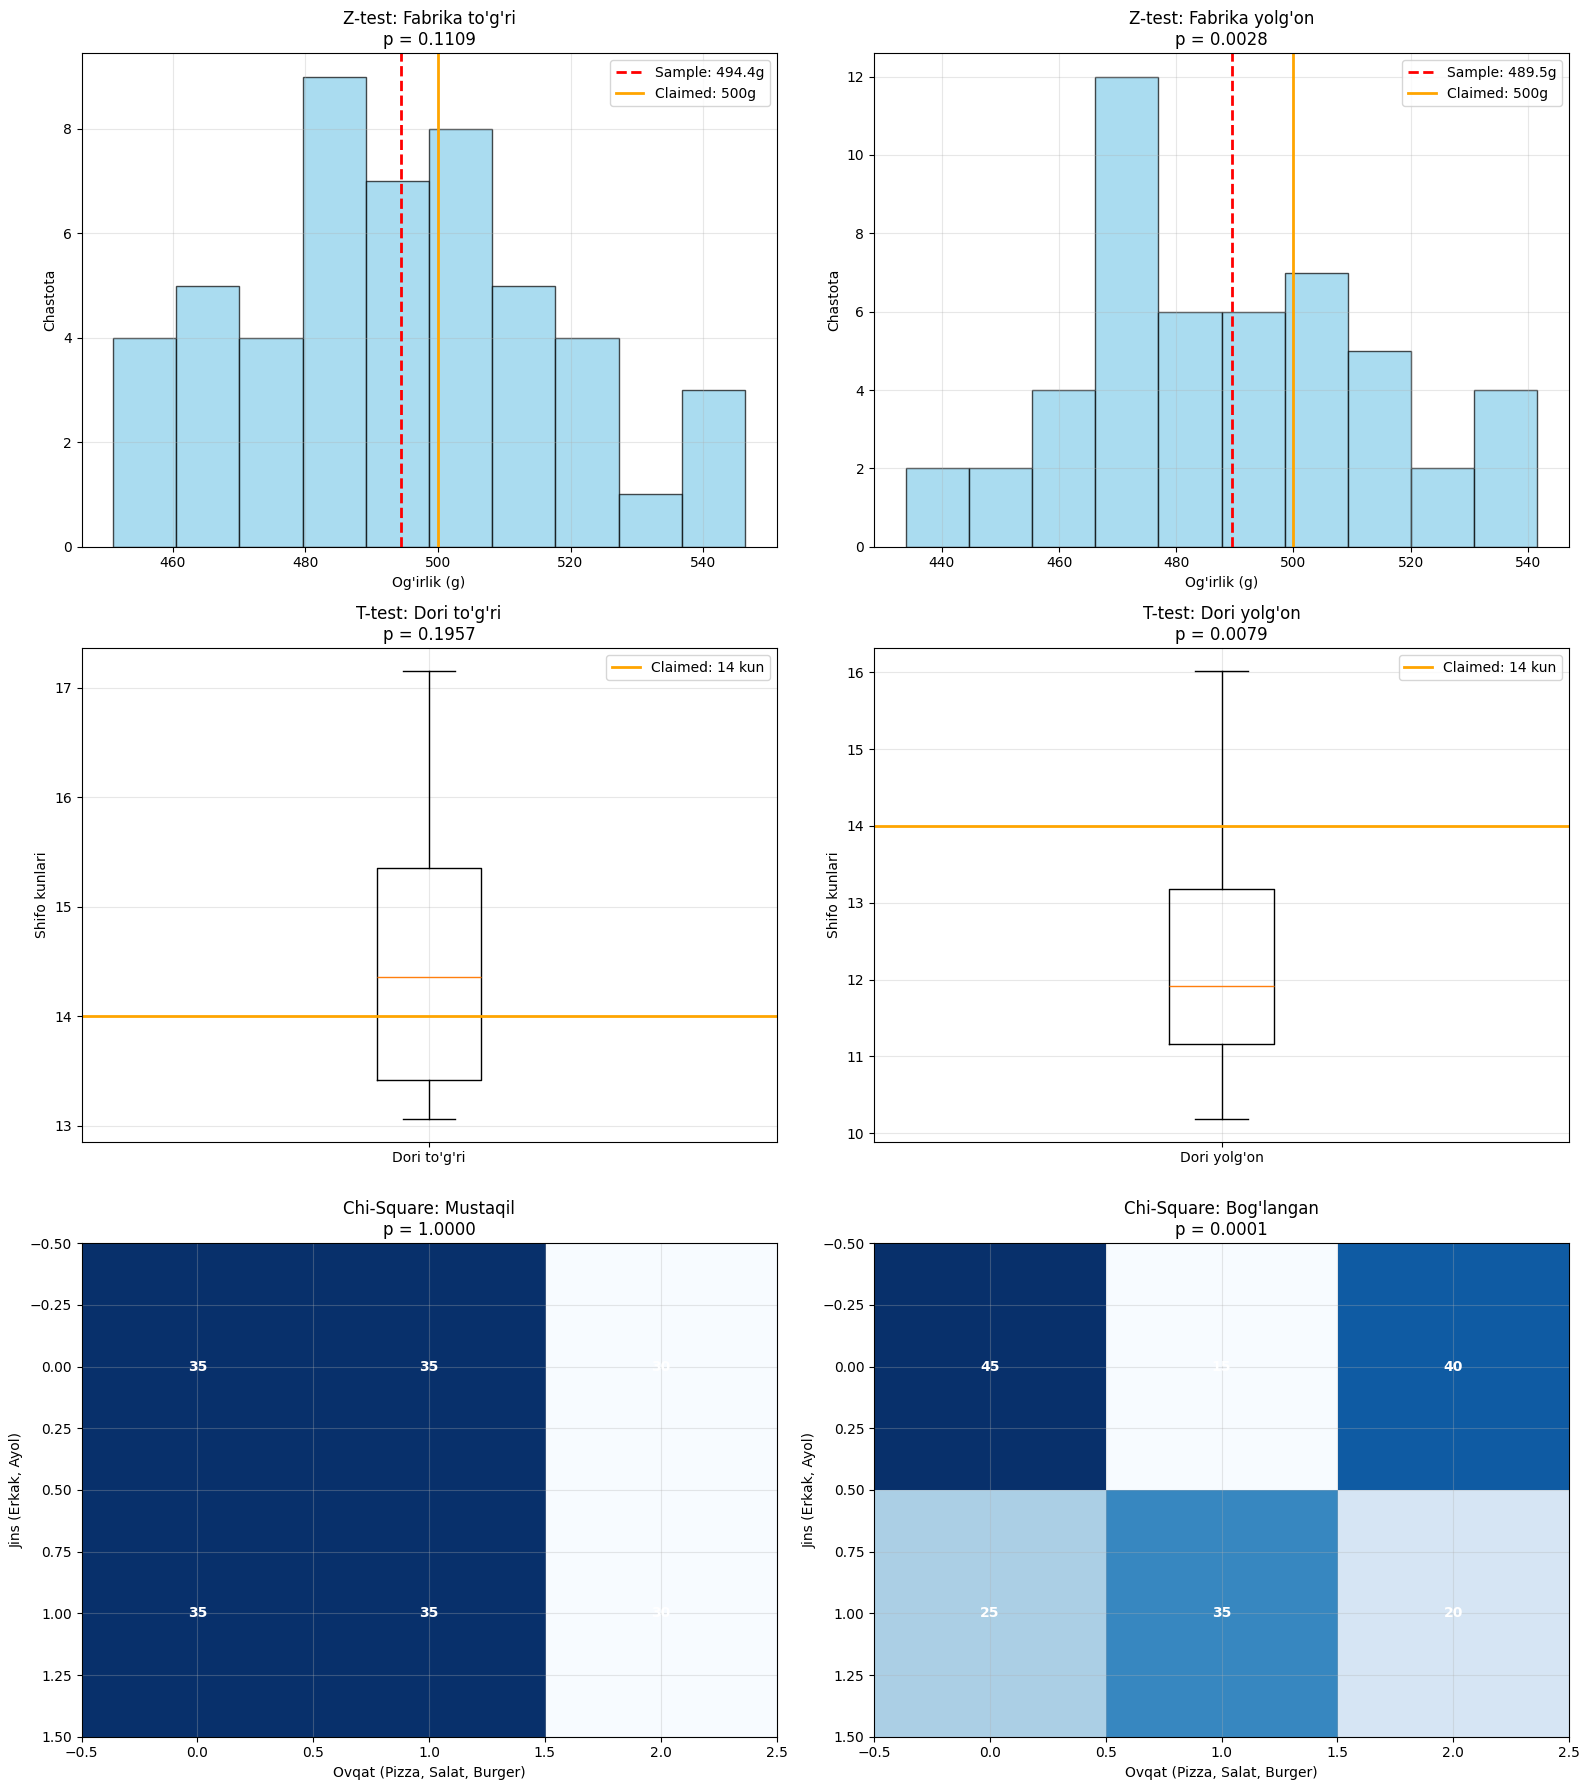


🎯 SIMULATSIYA XULOSALARI
📊 Z-test:
   • To'g'ri fabrika: p > 0.05 (qabul)
   • Yolg'on fabrika: p < 0.05 (rad)

💊 T-test:
   • To'g'ri dori: p > 0.05 (qabul)
   • Yolg'on dori: p < 0.05 (rad)

🍕 Chi-Square:
   • Mustaqil: p > 0.05 (bog'lanish yo'q)
   • Bog'langan: p < 0.05 (bog'lanish bor)

💡 ASOSIY QOIDA: p < 0.05 → H₀ ni rad et!


In [25]:
# 🎮 YAKUNIY MASHQ: Barcha testlarni simulatsiya qilish
print("🎮 INTERAKTIV SIMULATSIYA: BARCHA TESTLAR")
print("=" * 50)

# Test tanlovchisi
def run_hypothesis_test_simulation():
    """Barcha testlar uchun universal simulatsiya"""
    
    print("🔍 QAYSI TESTNI SINAB KO'RMOQCHISIZ?")
    print("1. Z-test (Fabrika simulatsiyasi)")
    print("2. T-test (Dori simulatsiyasi)") 
    print("3. Chi-Square (Restoran simulatsiyasi)")
    print("4. Hammasi bir vaqtda!")
    
    # Barcha testlarni birga ko'rsatish
    choice = 4  # Avtomatik barcha testlarni ko'rsatish
    
    if choice == 4:
        print("\n🌟 BARCHA TESTLARNI BIR VAQTDA SIMULATSIYA QILAMIZ!")
        print("=" * 55)
        
        # 3x2 grid yaratamiz
        fig, axes = plt.subplots(3, 2, figsize=(16, 18))
        
        # Z-TEST SIMULATSIYASI
        print("\n🍫 1. Z-TEST SIMULATSIYASI")
        print("-" * 25)
        
        # Har xil ssenariylar uchun Z-test
        scenarios_z = [
            {"name": "Fabrika to'g'ri", "true_mean": 500, "claimed": 500},
            {"name": "Fabrika yolg'on", "true_mean": 485, "claimed": 500}
        ]
        
        for i, scenario in enumerate(scenarios_z):
            np.random.seed(42 + i)
            samples = np.random.normal(scenario["true_mean"], 25, 50)
            sample_mean = np.mean(samples)
            z_score = (sample_mean - scenario["claimed"]) / (25/np.sqrt(50))
            p_value = 2 * (1 - norm.cdf(abs(z_score)))
            
            # Histogram
            axes[0, i].hist(samples, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
            axes[0, i].axvline(sample_mean, color='red', linestyle='--', linewidth=2, 
                              label=f'Sample: {sample_mean:.1f}g')
            axes[0, i].axvline(scenario["claimed"], color='orange', linestyle='-', linewidth=2,
                              label=f'Claimed: {scenario["claimed"]}g')
            axes[0, i].set_title(f'Z-test: {scenario["name"]}\np = {p_value:.4f}')
            axes[0, i].set_xlabel('Og\'irlik (g)')
            axes[0, i].set_ylabel('Chastota')
            axes[0, i].legend()
            axes[0, i].grid(True, alpha=0.3)
            
            print(f"   {scenario['name']}: Z = {z_score:.3f}, p = {p_value:.4f}")
        
        # T-TEST SIMULATSIYASI  
        print("\n💊 2. T-TEST SIMULATSIYASI")
        print("-" * 25)
        
        scenarios_t = [
            {"name": "Dori to'g'ri", "true_mean": 14, "claimed": 14, "n": 12},
            {"name": "Dori yolg'on", "true_mean": 12, "claimed": 14, "n": 12}
        ]
        
        for i, scenario in enumerate(scenarios_t):
            np.random.seed(42 + i)
            samples = np.random.normal(scenario["true_mean"], 2, scenario["n"])
            sample_mean = np.mean(samples)
            sample_std = np.std(samples, ddof=1)
            t_score = (sample_mean - scenario["claimed"]) / (sample_std/np.sqrt(scenario["n"]))
            p_value = 2 * (1 - t.cdf(abs(t_score), scenario["n"]-1))
            
            # Boxplot
            axes[1, i].boxplot([samples], labels=[scenario["name"]])
            axes[1, i].axhline(scenario["claimed"], color='orange', linestyle='-', 
                              linewidth=2, label=f'Claimed: {scenario["claimed"]} kun')
            axes[1, i].set_title(f'T-test: {scenario["name"]}\np = {p_value:.4f}')
            axes[1, i].set_ylabel('Shifo kunlari')
            axes[1, i].legend()
            axes[1, i].grid(True, alpha=0.3)
            
            print(f"   {scenario['name']}: T = {t_score:.3f}, p = {p_value:.4f}")
        
        # CHI-SQUARE SIMULATSIYASI
        print("\n🍕 3. CHI-SQUARE SIMULATSIYASI")
        print("-" * 30)
        
        # Mustaqil va bog'langan holatlar
        scenarios_chi = [
            {"name": "Mustaqil", "data": np.array([[35, 35, 30], [35, 35, 30]])},
            {"name": "Bog'langan", "data": np.array([[45, 15, 40], [25, 35, 20]])}
        ]
        
        for i, scenario in enumerate(scenarios_chi):
            chi2_stat, p_value, dof, expected = stats.chi2_contingency(scenario["data"])
            
            # Heatmap
            im = axes[2, i].imshow(scenario["data"], cmap='Blues', aspect='auto')
            axes[2, i].set_title(f'Chi-Square: {scenario["name"]}\np = {p_value:.4f}')
            axes[2, i].set_xlabel('Ovqat (Pizza, Salat, Burger)')
            axes[2, i].set_ylabel('Jins (Erkak, Ayol)')
            
            # Qiymatlarni hujayralarga yozish
            for row in range(scenario["data"].shape[0]):
                for col in range(scenario["data"].shape[1]):
                    axes[2, i].text(col, row, str(scenario["data"][row, col]), 
                                   ha='center', va='center', fontweight='bold', color='white')
            
            axes[2, i].grid(True, alpha=0.3)
            
            print(f"   {scenario['name']}: χ² = {chi2_stat:.3f}, p = {p_value:.4f}")
        
        plt.tight_layout()
        plt.show()
        
        # UMUMIY XULOSA
        print("\n" + "="*50)
        print("🎯 SIMULATSIYA XULOSALARI")
        print("="*50)
        print("📊 Z-test:")
        print("   • To'g'ri fabrika: p > 0.05 (qabul)")
        print("   • Yolg'on fabrika: p < 0.05 (rad)")
        print()
        print("💊 T-test:")
        print("   • To'g'ri dori: p > 0.05 (qabul)")
        print("   • Yolg'on dori: p < 0.05 (rad)")
        print()
        print("🍕 Chi-Square:")
        print("   • Mustaqil: p > 0.05 (bog'lanish yo'q)")
        print("   • Bog'langan: p < 0.05 (bog'lanish bor)")
        print()
        print("💡 ASOSIY QOIDA: p < 0.05 → H₀ ni rad et!")

# Simulatsiyani ishga tushirish
run_hypothesis_test_simulation()

In [26]:
# 🚀 O'ZINGIZ SINAB KO'RING: Do'stlik mashqi
print("🚀 O'ZINGIZ SINAB KO'RING!")
print("=" * 30)

# O'quvchilar uchun interaktiv mashq
def student_practice():
    """O'quvchilar o'zlari hisoblashi uchun oddiy mashq"""
    
    print("👥 MASHQ 1: Do'stlar bilan tanga o'yini")
    print("-" * 35)
    print("Vazifa: Do'stingiz 20 marta tanga tashladi va 15 marta bosh tushdi.")
    print("Savol: Bu tanga adolatlimi?")
    print()
    
    # Ma'lumotlar
    n_tosses = 20
    heads_observed = 15
    expected_prob = 0.5
    
    print(f"📊 Ma'lumotlar:")
    print(f"   • Jami tashlar: {n_tosses}")
    print(f"   • Bosh tushgan: {heads_observed}")
    print(f"   • Foiz: {heads_observed/n_tosses*100:.1f}%")
    print(f"   • Kutilgan foiz: {expected_prob*100}%")
    print()
    
    # Binomial test (oddiy usul)
    from scipy.stats import binom
    p_value = 2 * (1 - binom.cdf(heads_observed-1, n_tosses, expected_prob))
    
    print("🧮 Hisoblash:")
    print(f"   Agar tanga adolatli bo'lsa, 20 martadan 15+ marta")
    print(f"   bosh tushish ehtimoli: p = {p_value:.4f}")
    print()
    
    print("🎯 Xulosa:")
    if p_value < 0.05:
        print("   ✅ p < 0.05 → Tanga NOADOLAT!")
        print("   ✅ 15/20 juda ko'p, tasodif emas!")
    else:
        print("   ❌ p > 0.05 → Tanga ADOLAT!")
        print("   ❌ 15/20 tasodif bo'lishi mumkin!")
    
    print("\n" + "="*40)
    print("👥 MASHQ 2: Sinf natijalari")
    print("-" * 25)
    print("Vazifa: Sizning sinfingiz matematikadan o'rtacha 75 ball oldi.")
    print("       Maktab o'rtachasi 70 ball.")
    print("Savol: Sizning sinf yaxshiroqmi?")
    print()
    
    # Ma'lumotlar (simulatsiya)
    np.random.seed(123)
    class_scores = np.random.normal(75, 8, 25)  # 25 o'quvchi
    school_average = 70
    
    sample_mean = np.mean(class_scores)
    sample_std = np.std(class_scores, ddof=1)
    n = len(class_scores)
    
    print(f"📊 Ma'lumotlar:")
    print(f"   • Sinf o'rtachasi: {sample_mean:.2f}")
    print(f"   • Maktab o'rtachasi: {school_average}")
    print(f"   • O'quvchilar soni: {n}")
    print(f"   • Sinf standart og'ishi: {sample_std:.2f}")
    print()
    
    # T-test
    t_score = (sample_mean - school_average) / (sample_std / np.sqrt(n))
    df = n - 1
    p_value_t = 2 * (1 - t.cdf(abs(t_score), df))
    
    print("🧮 T-test hisoblash:")
    print(f"   t = ({sample_mean:.2f} - {school_average}) / ({sample_std:.2f}/√{n})")
    print(f"   t = {t_score:.3f}")
    print(f"   p-qiymat = {p_value_t:.4f}")
    print()
    
    print("🎯 Xulosa:")
    if p_value_t < 0.05:
        print("   ✅ p < 0.05 → Sizning sinf YAXSHIROQ!")
        print("   ✅ Farq statistik jihatdan ahamiyatli!")
    else:
        print("   ❌ p > 0.05 → Farq tasodifiy!")
        print("   ❌ Sizning sinf oddiy sinf!")
    
    print("\n" + "="*40)
    print("🎮 MASHQ 3: Do'stlar va sevimli rang")
    print("-" * 35)
    print("Vazifa: Do'stlaringizdan sevimli ranglarini so'radingiz.")
    print("Savol: Jins va rang tanlovi bog'langanmi?")
    print()
    
    # Ma'lumotlar
    friends_data = pd.DataFrame({
        'Qizil': [8, 12],
        'Ko\'k': [15, 8], 
        'Yashil': [7, 10]
    }, index=['O\'g\'il', 'Qiz'])
    
    print("📊 Ma'lumotlar:")
    print(friends_data)
    print()
    
    # Chi-square test
    chi2_stat, p_chi, dof, expected = stats.chi2_contingency(friends_data)
    
    print("🧮 Chi-square hisoblash:")
    print(f"   χ² = {chi2_stat:.3f}")
    print(f"   df = {dof}")
    print(f"   p-qiymat = {p_chi:.4f}")
    print()
    
    print("🎯 Xulosa:")
    if p_chi < 0.05:
        print("   ✅ p < 0.05 → Jins va rang BOG'LANGAN!")
        print("   ✅ O'g'il va qizlar har xil rang yoqtiradi!")
    else:
        print("   ❌ p > 0.05 → Jins va rang MUSTAQIL!")
        print("   ❌ Hamma bir xil rang yoqtiradi!")
    
    print("\n" + "🌟"*20)
    print("🎉 TABRIKLAYMIZ! Siz hipoteza testini o'rgandingiz!")
    print("💡 Endi hayotda shubhali narsalarni ilmiy usulda tekshira olasiz!")
    print("🚀 Data Science yo'lida birinchi qadam tashlangiz!")
    print("🌟"*20)

# Mashqni ishga tushirish
student_practice()

🚀 O'ZINGIZ SINAB KO'RING!
👥 MASHQ 1: Do'stlar bilan tanga o'yini
-----------------------------------
Vazifa: Do'stingiz 20 marta tanga tashladi va 15 marta bosh tushdi.
Savol: Bu tanga adolatlimi?

📊 Ma'lumotlar:
   • Jami tashlar: 20
   • Bosh tushgan: 15
   • Foiz: 75.0%
   • Kutilgan foiz: 50.0%

🧮 Hisoblash:
   Agar tanga adolatli bo'lsa, 20 martadan 15+ marta
   bosh tushish ehtimoli: p = 0.0414

🎯 Xulosa:
   ✅ p < 0.05 → Tanga NOADOLAT!
   ✅ 15/20 juda ko'p, tasodif emas!

👥 MASHQ 2: Sinf natijalari
-------------------------
Vazifa: Sizning sinfingiz matematikadan o'rtacha 75 ball oldi.
       Maktab o'rtachasi 70 ball.
Savol: Sizning sinf yaxshiroqmi?

📊 Ma'lumotlar:
   • Sinf o'rtachasi: 76.12
   • Maktab o'rtachasi: 70
   • O'quvchilar soni: 25
   • Sinf standart og'ishi: 9.85

🧮 T-test hisoblash:
   t = (76.12 - 70) / (9.85/√25)
   t = 3.106
   p-qiymat = 0.0048

🎯 Xulosa:
   ✅ p < 0.05 → Sizning sinf YAXSHIROQ!
   ✅ Farq statistik jihatdan ahamiyatli!

🎮 MASHQ 3: Do'stlar va